In [1]:
import pandas as pd

from prepare import *
from acquire import *

import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.linear_model import LinearRegression

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from prepare import *
import explore as e

In [2]:
#set seaborn color pallete
sns.set_palette('plasma')
pal = sns.set_palette('plasma')
palette = sns.color_palette().as_hex()

In [3]:
df, revert_key, replace_key = wrangle_data()

df = df.replace(replace_key)

In [4]:
train, validate, test = train_validate_test_split(df, 'is_pes')

In [5]:
train[train.columns[110:]]

,marital_status,religion,evangelical_christian,church_attendance,political_party_identity,political_party_lean,summary_of_political_party_data,family_income_nine_categories,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
1859,Divorced,"Protestant (for example, Baptist, Methodist, N...","Yes, born-again or evangelical Christian",Seldom,Independent,The Democratic Party,Dem/Lean Dem,"$20,000 to less than $30,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,3.057078,0,1,0,0
96,Divorced,Roman Catholic,"No, not born-again or evangelical Christian",Once a week,Democrat,nan,Dem/Lean Dem,"$50,000 to less than $75,000","$30-$74,999","You are PROBABLY registered, but there is a ch...",Liberal,Internet User,No,0.433484,1,2,0,0
420,Divorced,Agnostic,nan,Never,Independent,The Democratic Party,Dem/Lean Dem,"$40,000 to less than $50,000","$30-$74,999",nan,Liberal,Internet User,No,2.413983,0,1,0,0
1424,Never been married,Roman Catholic,"No, not born-again or evangelical Christian",Once or twice a month,Democrat,nan,Dem/Lean Dem,"$10,000 to less than $20,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.362586,0,1,0,0
114,Divorced,Roman Catholic,"Yes, born-again or evangelical Christian",Once a week,Independent,The Democratic Party,Dem/Lean Dem,"$50,000 to less than $75,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,0.303046,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Married,Nothing in particular,nan,Seldom,Independent,The Republican Party,Rep/Lean Rep,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,2.336849,1,2,0,0
957,Married,Roman Catholic,"No, not born-again or evangelical Christian",A few times a year,Independent,The Republican Party,Rep/Lean Rep,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,0.553714,0,1,0,0
239,Married,Mormon (Church of Jesus Christ of Latter-day S...,"No, not born-again or evangelical Christian",Once a week,Independent,The Republican Party,Rep/Lean Rep,"$150,000 or more","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,1.368277,0,1,0,0
1795,Married,"Protestant (for example, Baptist, Methodist, N...","Yes, born-again or evangelical Christian",Once a week,Independent,The Republican Party,Rep/Lean Rep,"$40,000 to less than $50,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,1.338218,0,1,0,0


In [6]:
class Attitudes_explore():
    '''
    Performs a series of analyses and explore functions on various features in our data.
    '''
    
    def __init__(self, df):
        '''
        Initializes the self of the class.
        '''
        self.df =  df
        
 
        
    def printout_all_chi_squared(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with our target. The function then prints out the test results for 
        each feature.
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

        
        #Loop through categorical features
        for col in categorical_features:
            
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get test results of chi-squared test
            test_results = stats.chi2_contingency(contingency_table)

            #Print out results of chi-squared test for each column
            print("Correlation between", col, "and the target")
    
            print(test_results)
        
            #Space in between each feature for readability 
            print(" ")
    
    
    def printout_only_significant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with out target. However, this function only prints out the results
        of the chi-squared test for the features which are shown to have a stastically significant
        relationship with the target. That is, the p-value of the chi-squared test is less than 0.5
        
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through every cateogiral feature
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Run a chi-squared test on the features
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #Print out the results of the chi-squared test if significant
            if p < 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
                    
            
    def get_list_of_significant_columns(df, target_feature):
        '''
        This function runs a chi-squared test on every categorical feature in the dataframe
        with the target variable. The function returns of list of features that have a stastically
        signficant relationship with the target
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

      
        #Make empty list of significant feature names
        significant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Create contigency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get the results of the chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is less than 0.05, append feature to list
            if p < 0.05:  
                
                significant_features.append(col)
        
        #Return list
        return(significant_features)
        
        
    def printout_insignificant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with the target variable. If the chi-squared test reveals an
        insignificant relationship with the target, this function prints the result of the
        chi-squared test.
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through categorical features
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p-value is greater than or equal to 0,05, print result of chi-sqared
            if p >= 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
        
        
    def get_list_of_insignificant_columns(df, target_feature):
        '''
        This function loops through every categorical features and performs a chi-squared
        test with the target variable. If the chi-sqaured test reveals an insignificant 
        relationship with the target feature, the categorical feature is appended to a list
        of insignificant features.
        ''' 
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Make list of insignificant features
        insignificant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Make contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is greater than or equal to 0.05, append feature to list.
            if p >= 0.05:
                
                insignificant_features.append(col)
            
        return(insignificant_features)
    
    
    def get_k_best(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables.
        The function then splits the data into X, the predictive features, and y, the 
        target feature. It then runs Select K Best to determine the features most predictive
        of the target.
        
        Note: Since, we created dummies, the name of the target feature has _1 added to the end.
        '''
        
        df = df.drop([columns_to_drop])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        # Create model
        kbest = SelectKBest(f_regression, k=n)
        
        #Fit the model
        kbest.fit(X, y)
        
        #Return the most predictive columns
        return X.columns[kbest.get_support()]
    
    def get_recursive_features(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables. 
        The function then splits teh data into X, the predictive features, and y, the target feature.
        It then runs Recursive Feature Elimination to determine the features most predictive of target.
        '''
        df = df.drop([columns_to_drop])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        #Create model
        rfe = RFE(estimator=LinearRegression(), n_features_to_select= n)
        #Fit the model
        rfe.fit(X, y)
        return X.columns[rfe.get_support()]
    
    def bar_plot(df, x_val, target):
        sns.barplot(x=x_val,y=target,data=df)
        plt.tight_layout()
        plt.show()
        
    def count_plot(df, col):
        plt.figure(figsize=(8,5))
        sns.countplot(x=col ,data=df)
        
        plt.tight_layout()
        plt.show()

## Let's explore age groups and income-related topics

In [250]:
divisive_topics = ['priority_increase_military', 'share_americans_in_lower_class', happen_walthgap]

In [251]:
income = ['family_income_three_categories', 'family_income_nine_categories', 'happen_wealthgap', 
         'share_americans_in_upper_class', 'share_americans_in_middle_class', 'share_americans_in_lower_class']

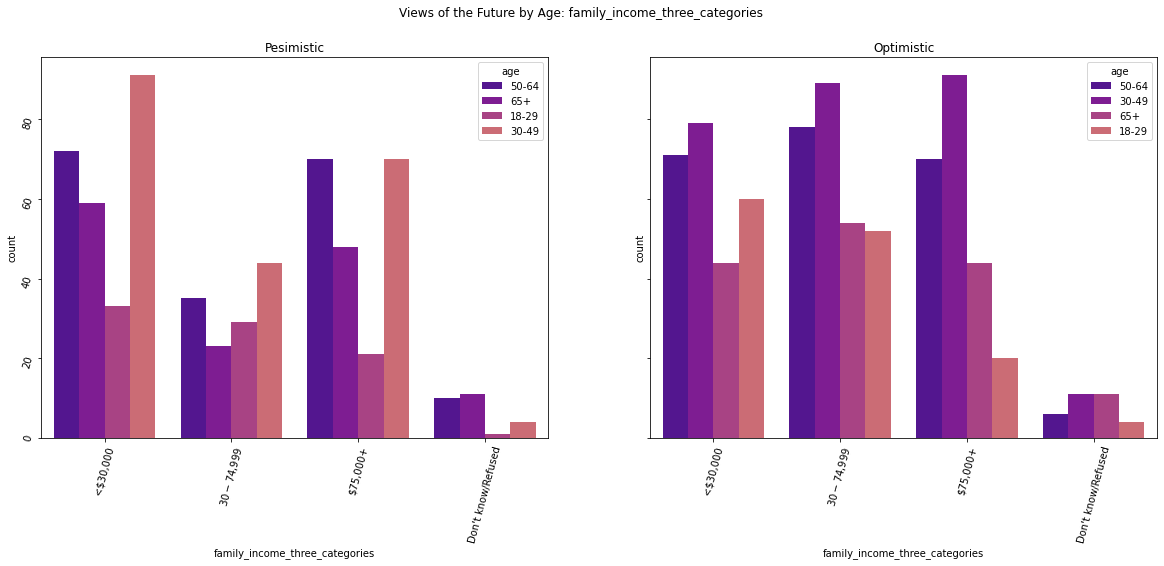

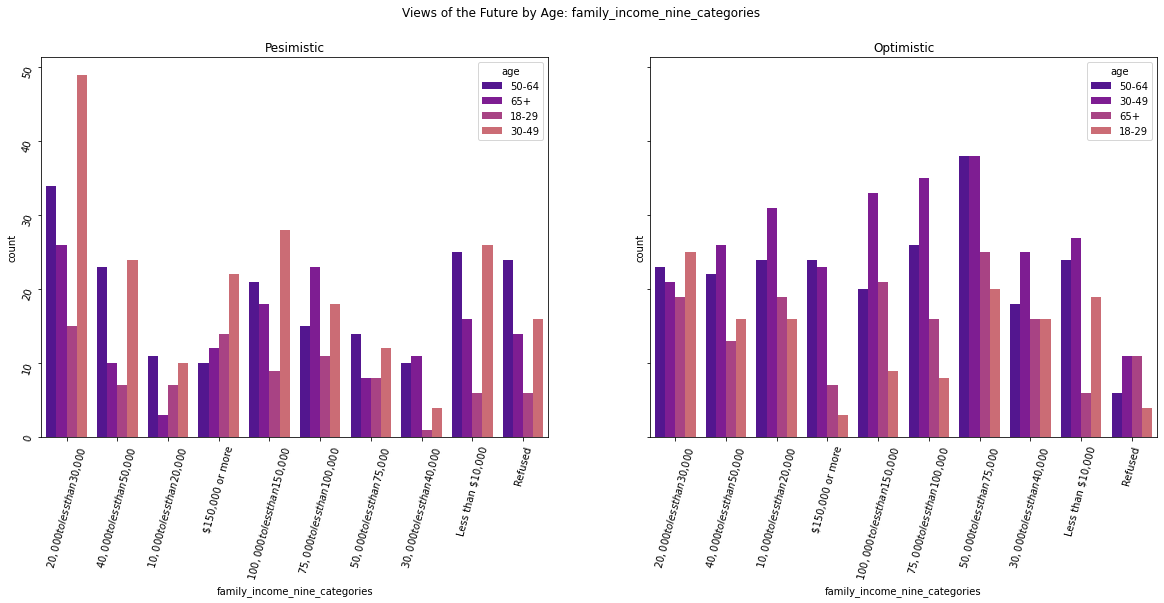

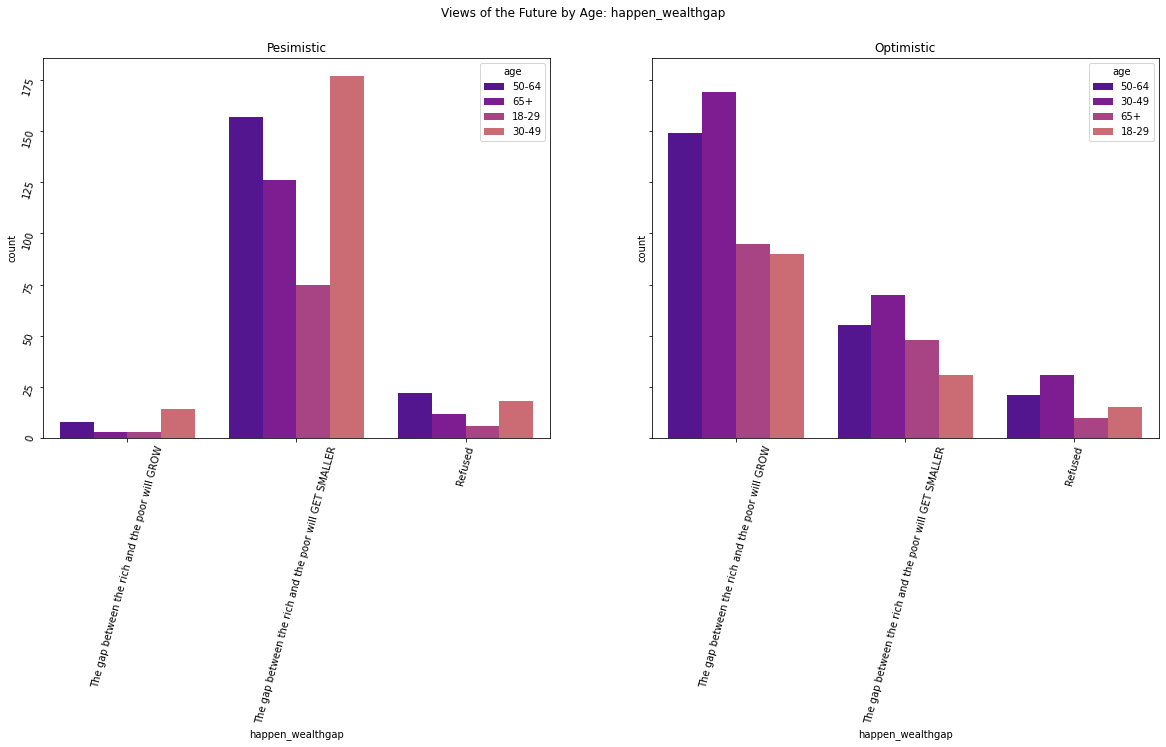

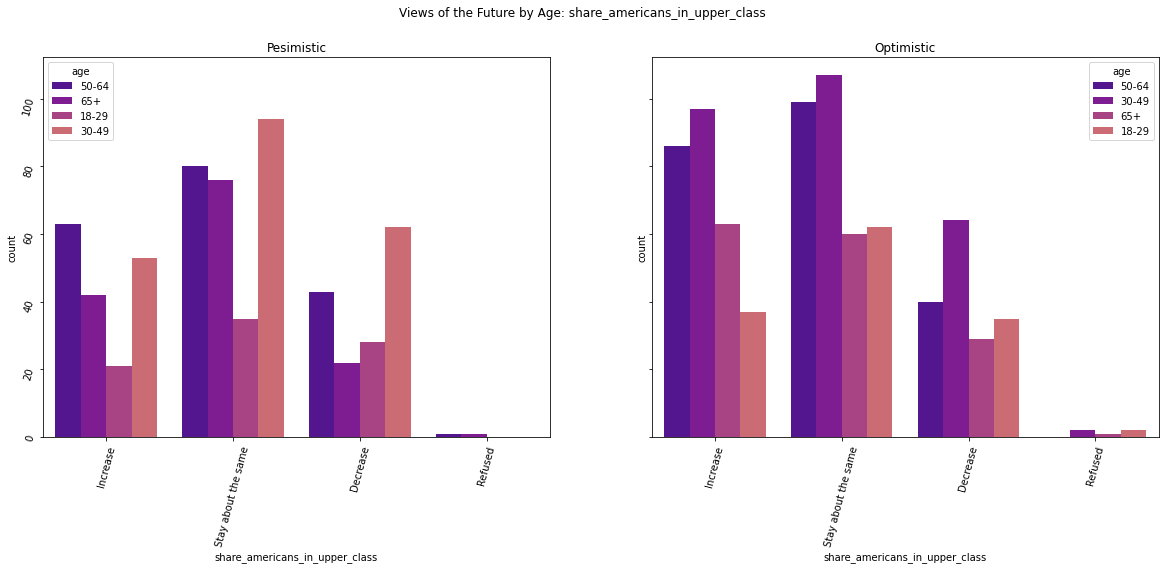

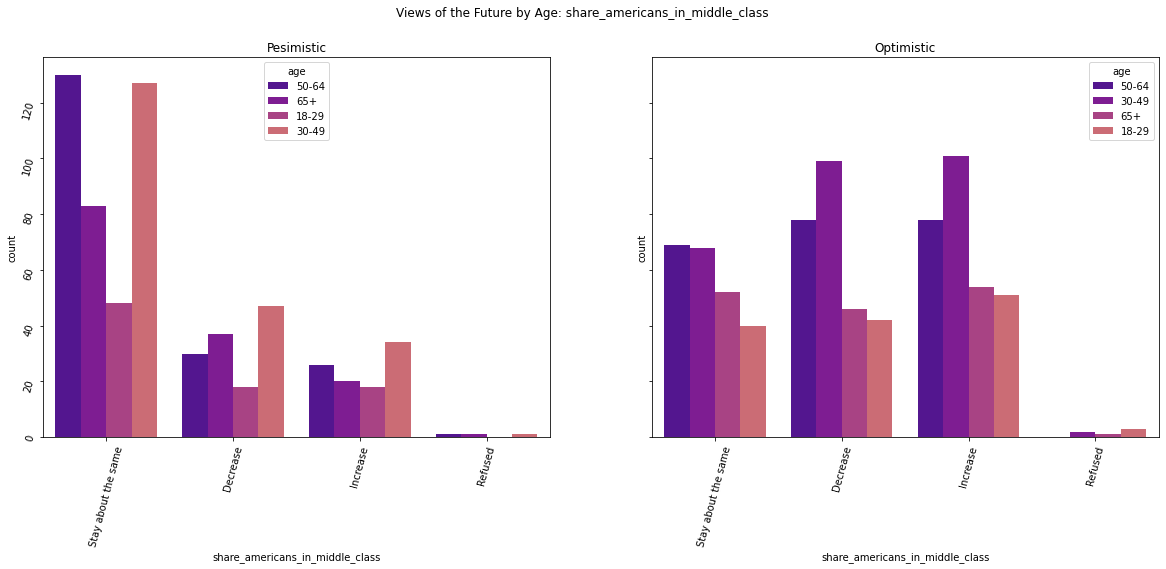

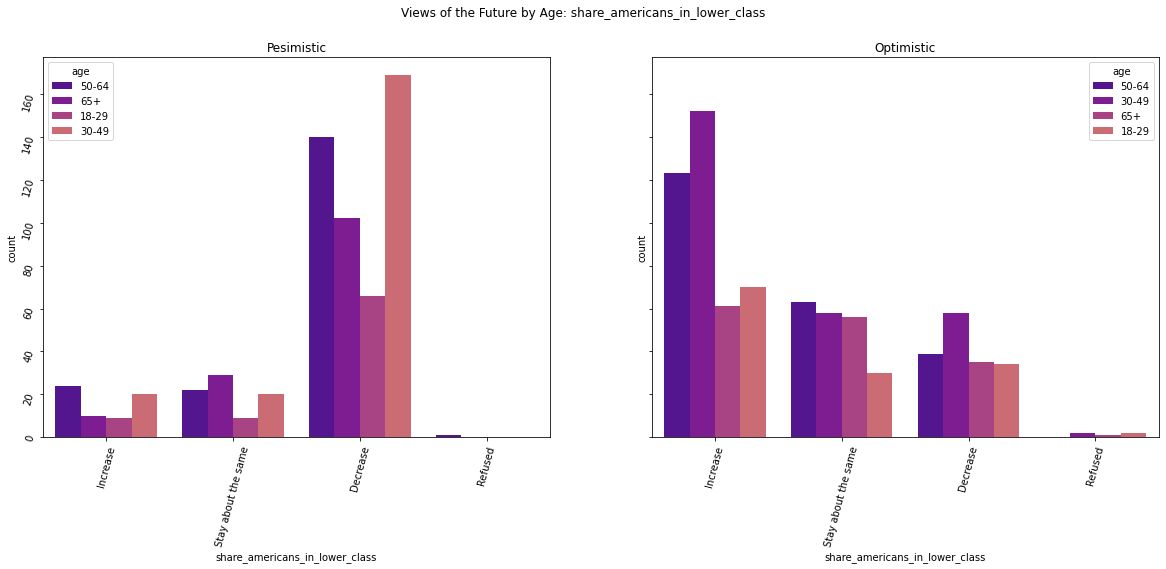

In [252]:
for col in income:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

In [9]:
df.columns[90:]

Index(['sci_tech', 'major_corps', 'rel_groups', 'gov_in_wash', 'state_local',
       'media', 'military', 'college_uni', 'schools', 'metro', 'census_region',
       'age', 'sex', 'highest_education_three_categories',
       'highest_education_six_categories', 'hispanic_or_latino', 'race',
       'race_and_ethnicity', 'birthplace', 'us_citizen', 'marital_status',
       'religion', 'evangelical_christian', 'church_attendance',
       'political_party_identity', 'political_party_lean',
       'summary_of_political_party_data', 'family_income_nine_categories',
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object')

In [10]:
train.family_income_nine_categories.value_counts()

$50,000 to less than $75,000      245
$100,000 to less than $150,000    159
$75,000 to less than $100,000     158
$20,000 to less than $30,000      146
$30,000 to less than $40,000      142
$40,000 to less than $50,000      141
$10,000 to less than $20,000      133
$150,000 or more                  117
Less than $10,000                 108
Refused                            59
Name: family_income_nine_categories, dtype: int64

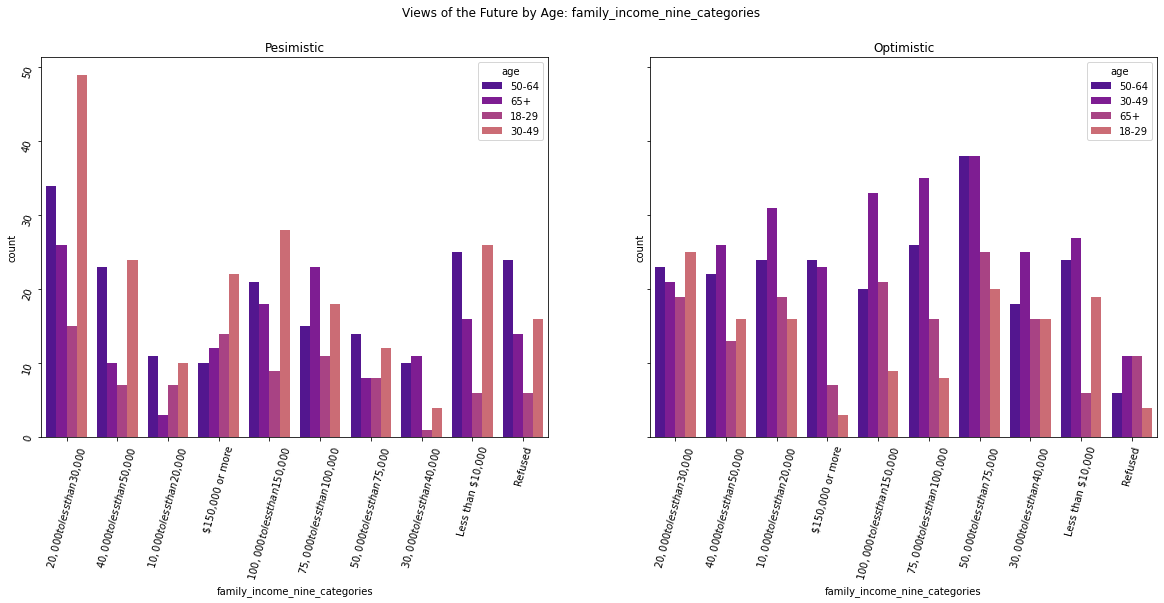

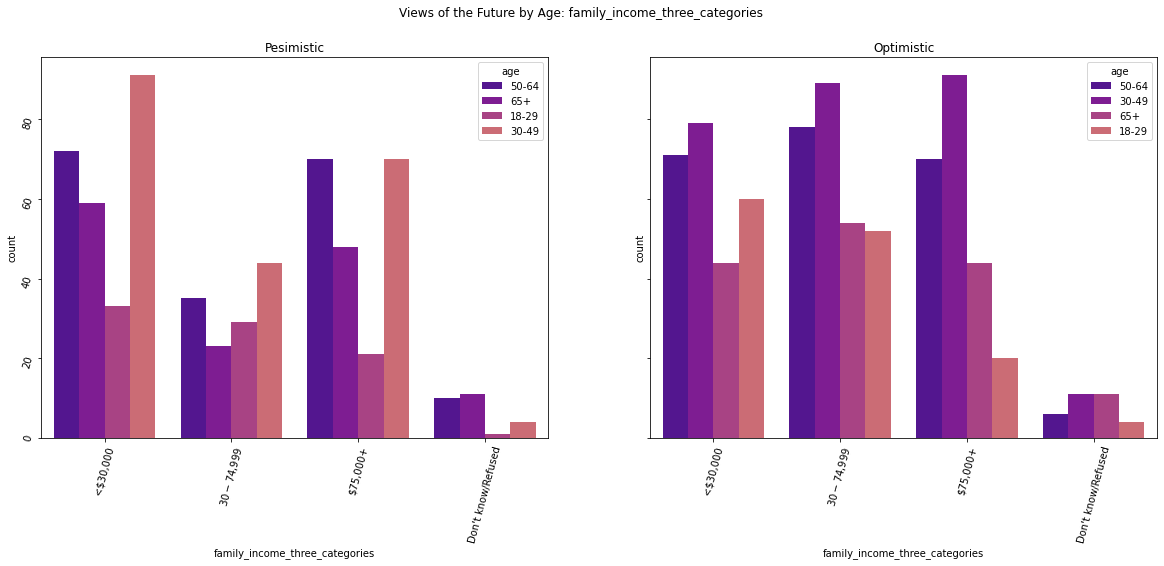

In [253]:
for col in ['family_income_nine_categories', 'family_income_three_categories']:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

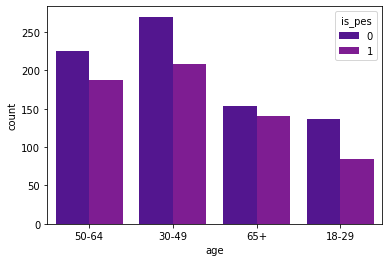

In [12]:
sns.countplot(data=train[train.age!='DK/REF'], x='age', hue='is_pes')
plt.show()

In [13]:
pes_percent = []

In [14]:
edu_percent = pd.crosstab(index=train['age'], columns=train['highest_education_six_categories'])
edu_percent

highest_education_six_categories,Associate's degree,College graduate/some post grad,Don't know/Refused,High school graduate,Less than high school,Postgraduate,"Some college, no degree"
age,,,,,,,
18-29,21,63,0,65,15,13,43
30-49,53,114,2,116,34,79,81
50-64,25,83,2,147,30,45,80
65+,16,43,0,99,24,55,57
DK/REF,0,1,0,1,1,0,0


In [15]:
df.columns

Index(['qkey', 'device_type', 'language', 'form', 'attitude', 'avg_family',
       'happen_general', 'happen_health', 'happen_race', 'happen_usa',
       ...
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object', length=128)

In [16]:
pol_party_percent = pd.crosstab(index=df['age'], columns=train['political_views'], normalize='index')
pol_party_percent

political_views,Conservative,Liberal,Moderate,Refused,Very conservative,Very liberal
age,,,,,,
18-29,0.118182,0.259091,0.409091,0.031818,0.036364,0.145455
30-49,0.208768,0.198330,0.421712,0.020877,0.058455,0.091858
50-64,0.250000,0.143204,0.419903,0.029126,0.087379,0.070388
65+,0.333333,0.176871,0.316327,0.006803,0.108844,0.057823
DK/REF,0.666667,0.000000,0.000000,0.000000,0.333333,0.000000


In [17]:
df.political_views.value_counts()

Moderate             977
Conservative         570
Liberal              480
Very liberal         213
Very conservative    204
Refused               71
Name: political_views, dtype: int64

---
---
---

# Univariate

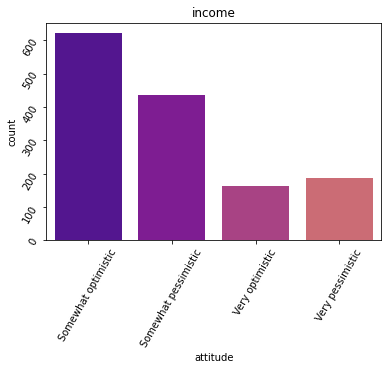

In [18]:
sns.countplot(data=train, x='attitude').set_title('income')
plt.tick_params(labelrotation=60)
plt.show()

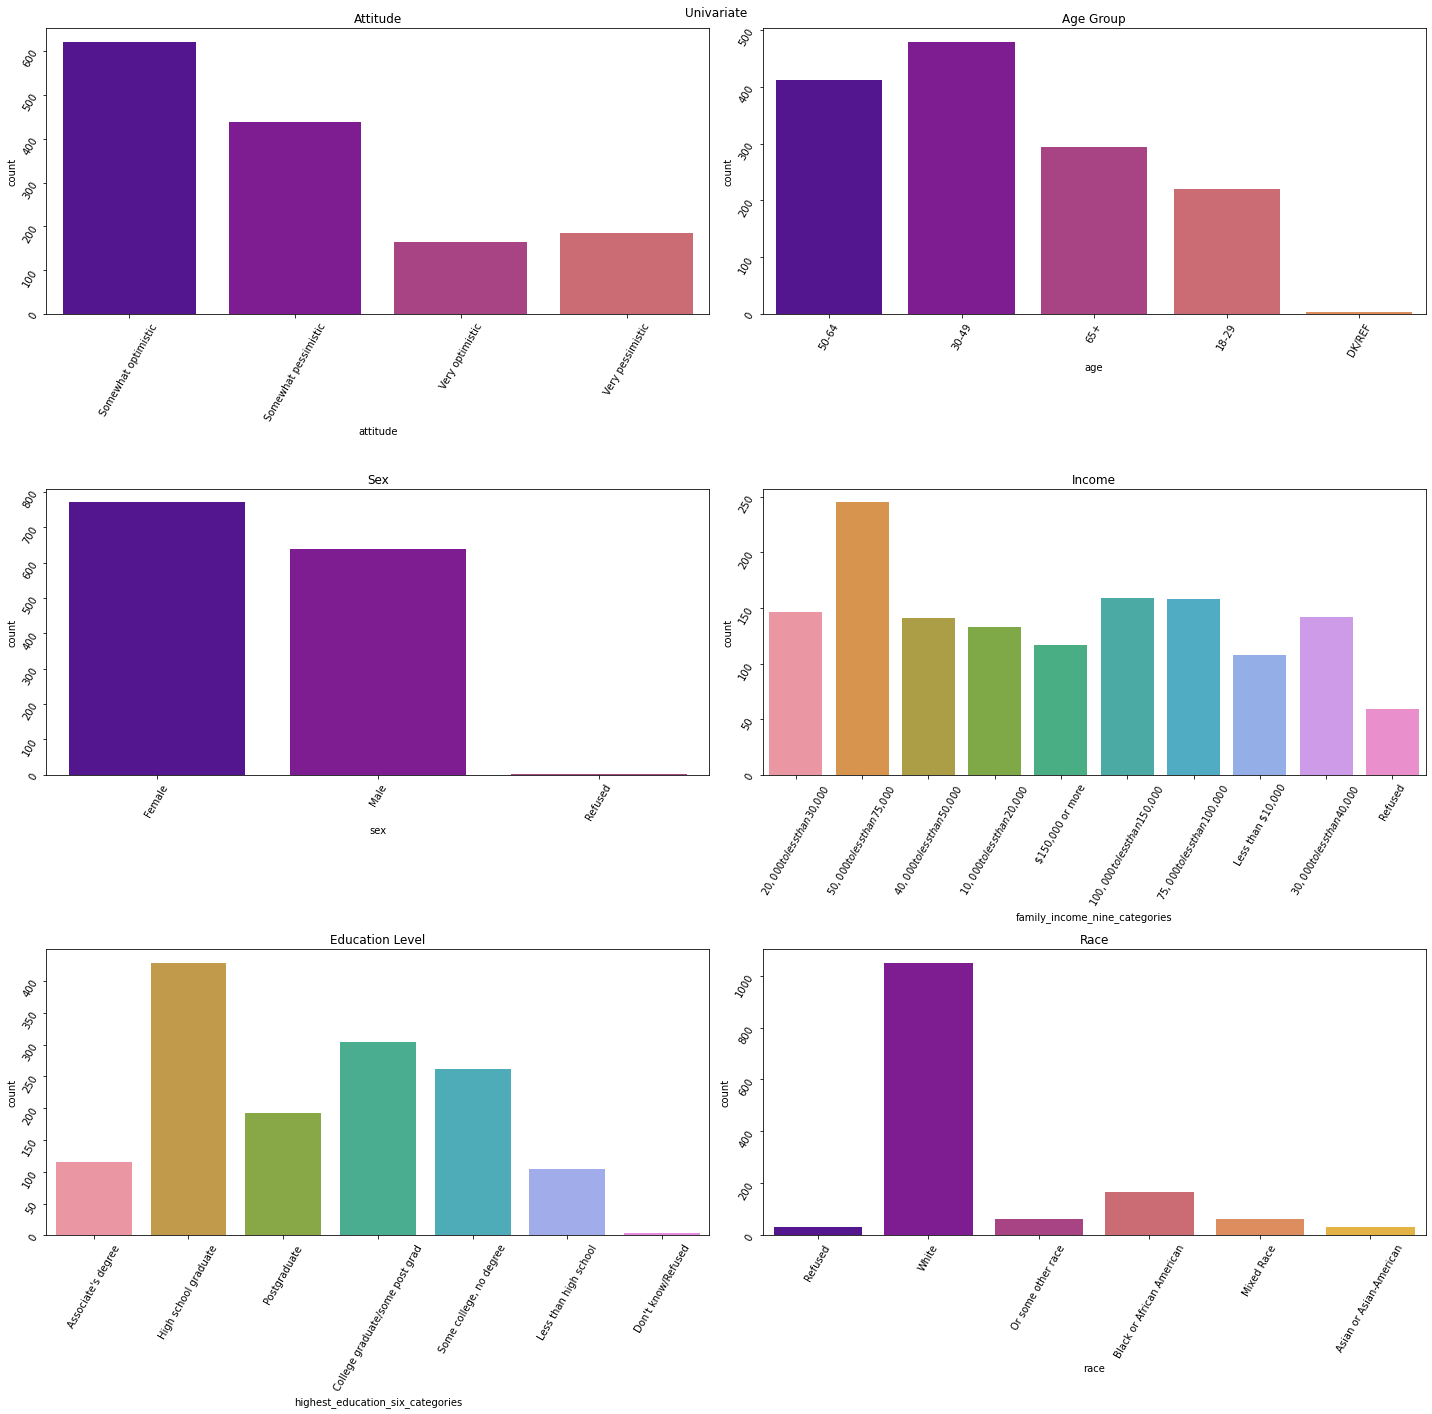

In [19]:
#for col in ['attitude', 'age', 'sex', 'education', 'income']:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=False, sharex=False,  figsize=(20,20))

# Set suptitle
fig.suptitle(f'Univariate')
#plt.xticks(rotation=45)

# First plot and its title
sns.countplot(data=train, x='attitude', ax=axes[0,0]).set_title('Attitude')
axes[0,0].tick_params(labelrotation=60)

# Second plot and its title
sns.countplot(data=train, x='age', ax=axes[0,1]).set_title('Age Group')
axes[0,1].tick_params(labelrotation=60)

# Third plot and its title
sns.countplot(data=train, x='sex', ax=axes[1,0]).set_title('Sex')
axes[1,0].tick_params(labelrotation=60)

# Fourth plot and its title
sns.countplot(data=train, x='family_income_nine_categories', ax=axes[1,1]).set_title('Income')
axes[1,1].tick_params(labelrotation=60)

# Fifth plot and its title
sns.countplot(data=train, x='highest_education_six_categories', ax=axes[2,0]).set_title('Education Level')
axes[2,0].tick_params(labelrotation=60)

# Sixth plot and its title
sns.countplot(data=train, x='race', ax=axes[2,1]).set_title('Race')
axes[2,1].tick_params(labelrotation=60)

plt.tight_layout()
plt.show()

---
---
---

In [20]:
train.attitude

1859     Somewhat optimistic
96      Somewhat pessimistic
420      Somewhat optimistic
1424     Somewhat optimistic
114     Somewhat pessimistic
                ...         
678     Somewhat pessimistic
957      Somewhat optimistic
239      Somewhat optimistic
1795     Somewhat optimistic
1297     Somewhat optimistic
Name: attitude, Length: 1408, dtype: object

In [21]:
pd.pivot_table(train, index='age', columns='attitude').pes_val

attitude,Somewhat optimistic,Somewhat pessimistic,Very optimistic,Very pessimistic
age,,,,
18-29,1.0,2.0,0.0,3.0
30-49,1.0,2.0,0.0,3.0
50-64,1.0,2.0,0.0,3.0
65+,1.0,2.0,0.0,3.0
DK/REF,NaN,2.0,0.0,3.0


In [22]:
military=[]
[military.append(col) for col in df.columns if col.__contains__('military')]
military

['priority_reduce_military', 'priority_increase_military', 'military']

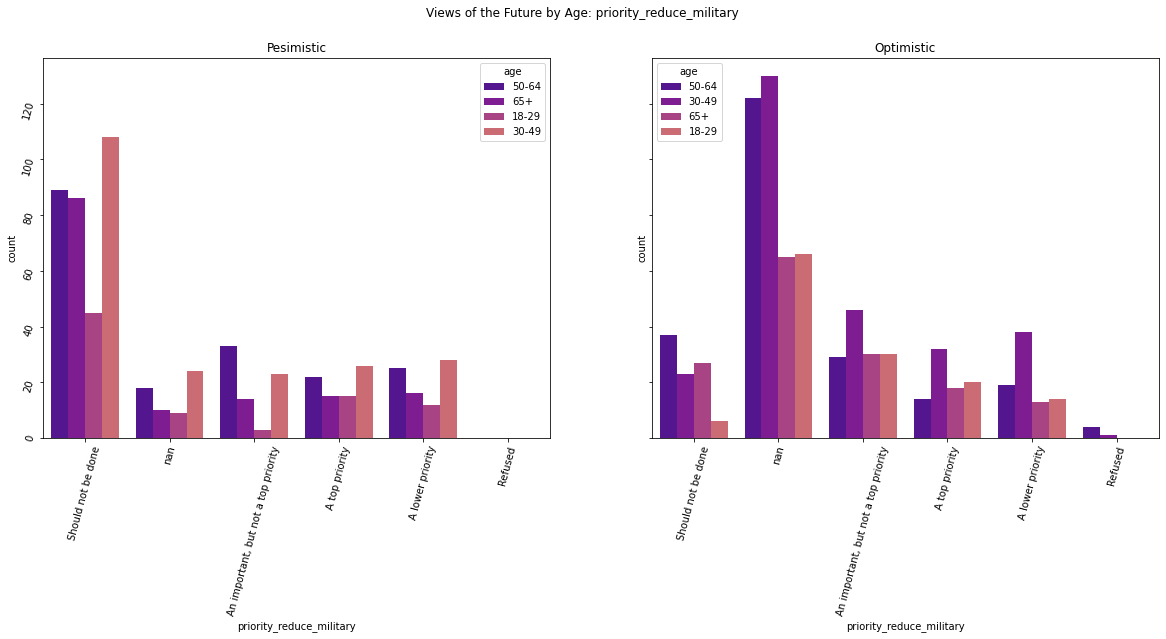

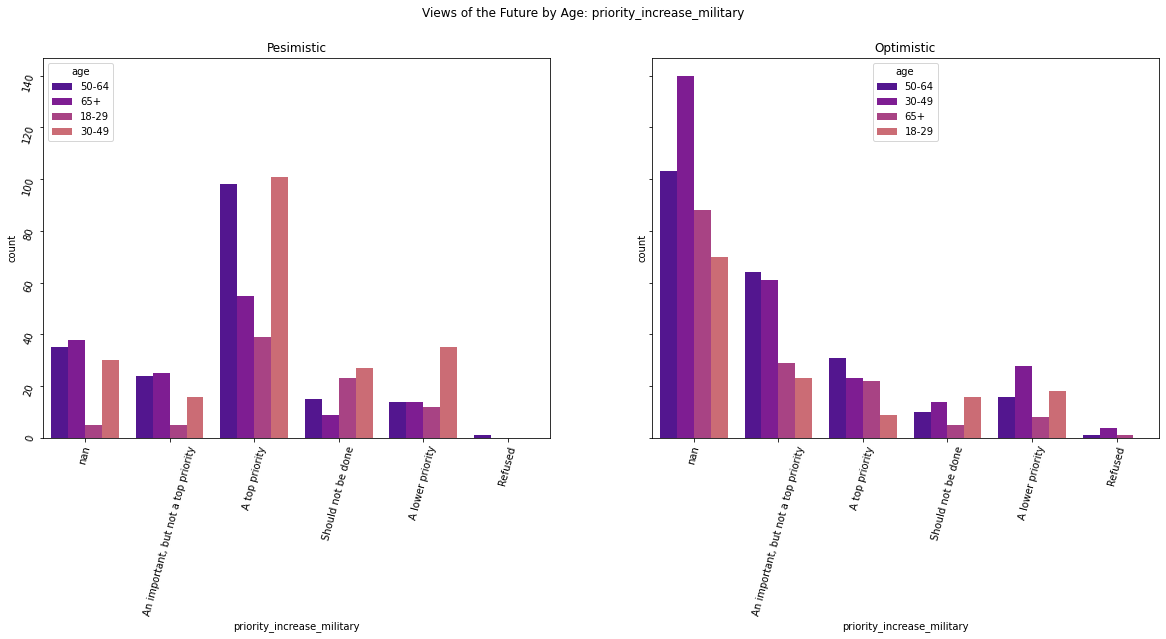

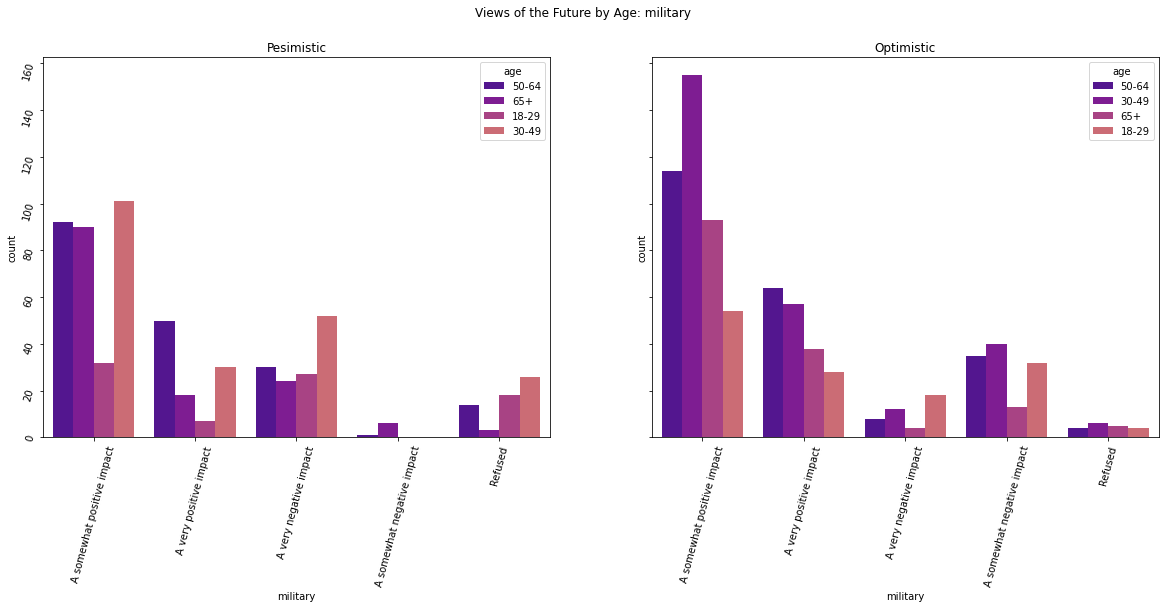

In [23]:
for col in military:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

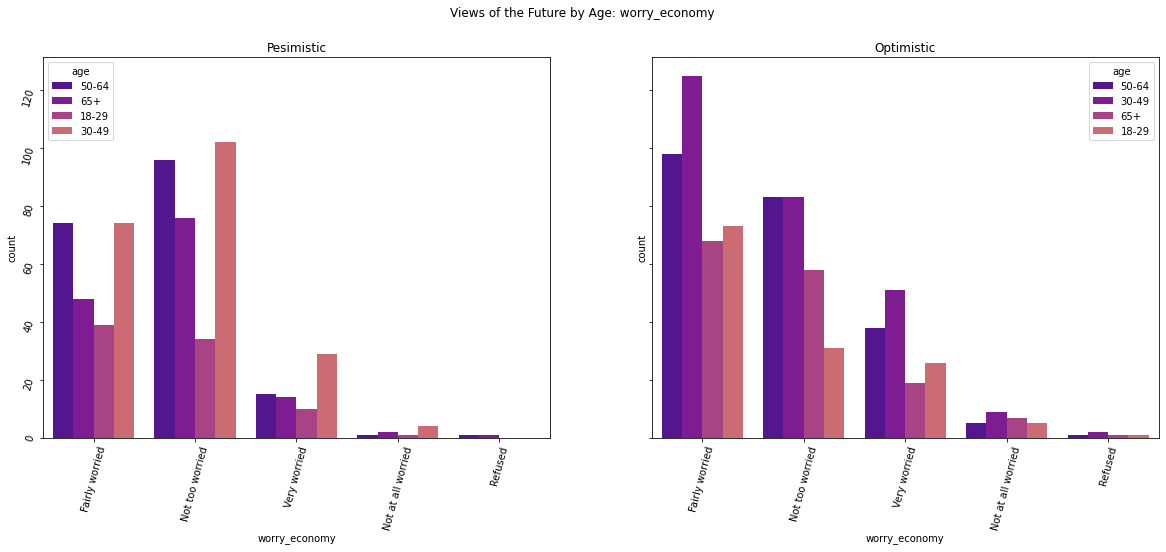

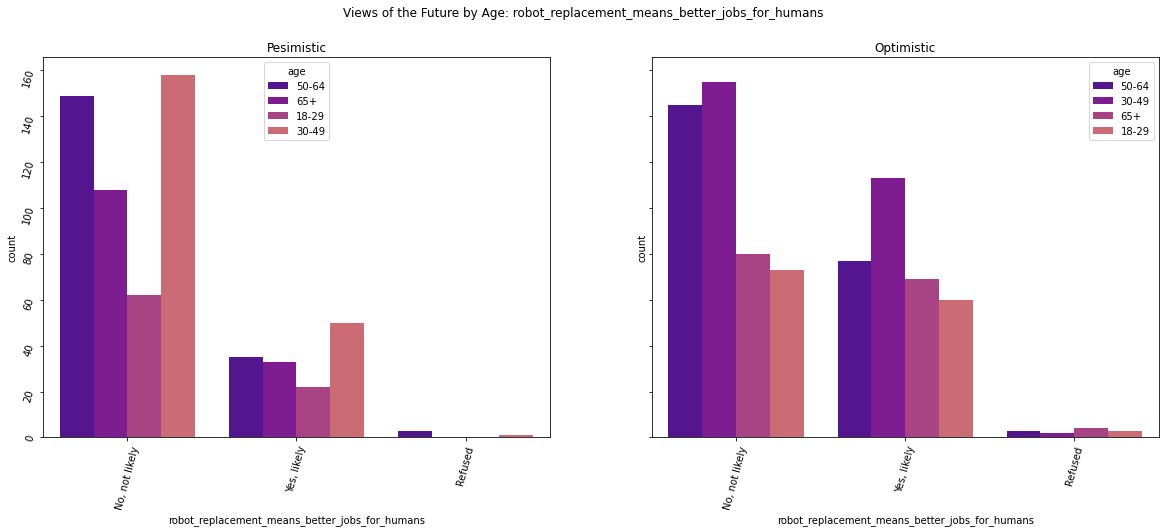

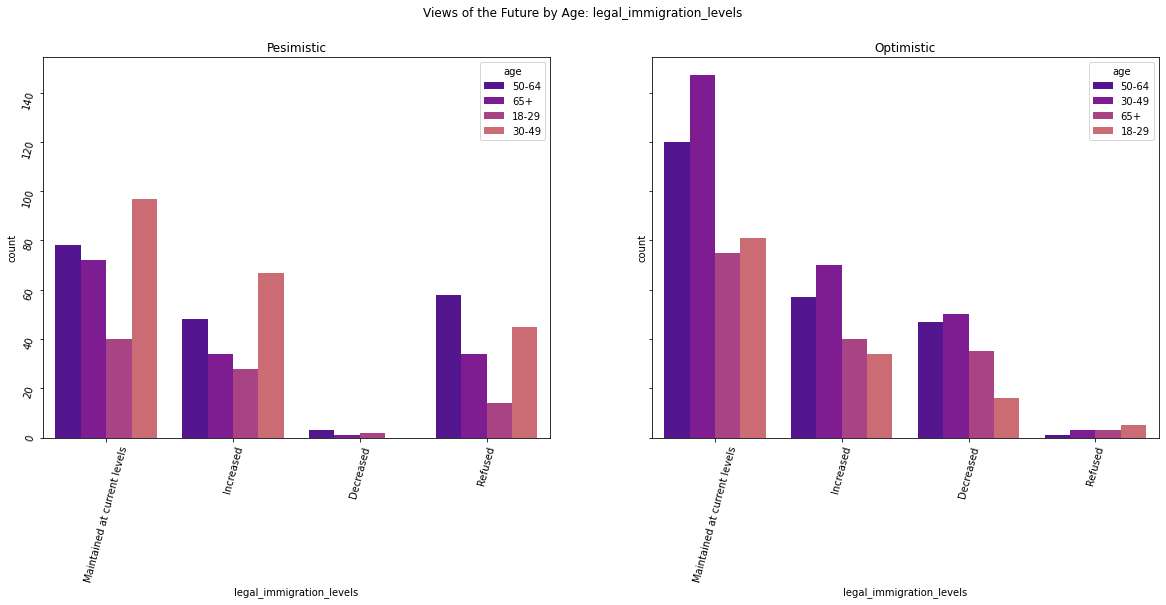

In [24]:
# Economy
# based off of question: contains section about economy
economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels']
for col in economy:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

<AxesSubplot:xlabel='age'>

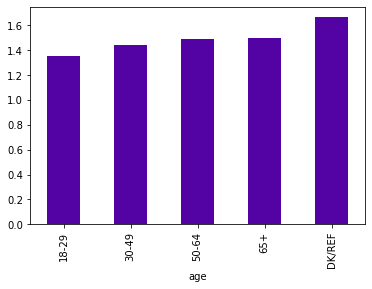

In [25]:
train.groupby('age').pes_val.mean().plot(kind='bar')

<AxesSubplot:xlabel='census_region'>

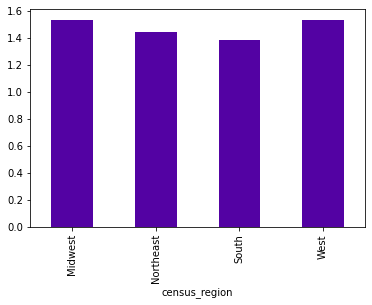

In [26]:
train.groupby('census_region').pes_val.mean().plot(kind='bar')

In [27]:
pd.pivot_table(data=train, index='age', values='is_pes', margins=True)

,is_pes
age,
18-29,0.381818
30-49,0.436326
50-64,0.453883
65+,0.479592
DK/REF,0.666667
All,0.442472


In [262]:
pd.crosstab(index=[train.age, train.is_pes],
            columns=train.census_region,
            colnames=['Region'])

Region         Midwest  Northeast  South  West
age    is_pes                                 
18-29  0            28         19     56    33
       1            25         17     23    19
30-49  0            64         31    118    57
       1            50         34     77    48
50-64  0            48         47     91    39
       1            42         21     77    47
65+    0            33         26     66    28
       1            36         26     45    34
DK/REF 0             0          0      1     0
       1             0          0      2     0

In [29]:
df.columns[100:]

Index(['census_region', 'age', 'sex', 'highest_education_three_categories',
       'highest_education_six_categories', 'hispanic_or_latino', 'race',
       'race_and_ethnicity', 'birthplace', 'us_citizen', 'marital_status',
       'religion', 'evangelical_christian', 'church_attendance',
       'political_party_identity', 'political_party_lean',
       'summary_of_political_party_data', 'family_income_nine_categories',
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object')

In [30]:
pd.crosstab(index=[train.age, train.is_pes],
            columns=train.political_party_identity,
            colnames=['Party'], normalize='index')

Party          Democrat  Independent   Refused  Republican  Something else
age    is_pes                                                             
18-29  0       0.330882     0.264706  0.022059    0.183824        0.198529
       1       0.357143     0.285714  0.035714    0.142857        0.178571
30-49  0       0.396296     0.222222  0.011111    0.240741        0.129630
       1       0.377990     0.244019  0.004785    0.210526        0.162679
50-64  0       0.395556     0.235556  0.017778    0.266667        0.084444
       1       0.379679     0.245989  0.010695    0.299465        0.064171
65+    0       0.307190     0.235294  0.013072    0.431373        0.013072
       1       0.312057     0.304965  0.000000    0.304965        0.078014
DK/REF 0       1.000000     0.000000  0.000000    0.000000        0.000000
       1       0.000000     0.500000  0.000000    0.500000        0.000000

In [31]:
df.political_party_identity.value_counts()

Democrat          911
Republican        679
Independent       602
Something else    294
Refused            29
Name: political_party_identity, dtype: int64

## Region

In [32]:
train.census_region.value_counts()

South        556
Midwest      326
West         305
Northeast    221
Name: census_region, dtype: int64

In [33]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train.political_party_identity,
            colnames=['Party'], normalize='columns')

Party                 Democrat  Independent   Refused  Republican  \
census_region is_pes                                                
Midwest       0       0.111111     0.105714  0.055556    0.145161   
              1       0.109162     0.088571  0.222222    0.115591   
Northeast     0       0.087719     0.074286  0.222222    0.096774   
              1       0.081871     0.091429  0.055556    0.043011   
South         0       0.249513     0.225714  0.222222    0.244624   
              1       0.144250     0.148571  0.000000    0.188172   
West          0       0.115010     0.122857  0.166667    0.094086   
              1       0.101365     0.142857  0.055556    0.072581   

Party                 Something else  
census_region is_pes                  
Midwest       0             0.154839  
              1             0.122581  
Northeast     0             0.077419  
              1             0.045161  
South         0             0.193548  
              1             0.180645  
West          0             0.109677  
              1             0.116129

In [34]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train.worry_economy,
            colnames=['Economy'], normalize='index')

Economy               Fairly worried  Not at all worried  Not too worried  \
census_region is_pes                                                        
Midwest       0             0.485549            0.023121         0.312139   
              1             0.509804            0.019608         0.065359   
Northeast     0             0.471545            0.024390         0.333333   
              1             0.551020            0.010204         0.091837   
South         0             0.442771            0.045181         0.322289   
              1             0.464286            0.008929         0.160714   
West          0             0.484076            0.025478         0.337580   
              1             0.486486            0.013514         0.094595   

Economy                Refused  Very worried  
census_region is_pes                          
Midwest       0       0.011561      0.167630  
              1       0.000000      0.405229  
Northeast     0       0.016260      0.154472  
              1       0.000000      0.346939  
South         0       0.000000      0.189759  
              1       0.004464      0.361607  
West          0       0.006369      0.146497  
              1       0.006757      0.398649

Whichever the region, the majority of people worry about the economy

In [308]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train.robot_replacement_means_better_jobs_for_humans,
            colnames=['Robots = Better Jobs'], margins=True)

Robots = Better Jobs    0    1   2   All
census_region is_pes                    
0             0        72   49   2   123
              1        77   21   0    98
1             0       200  129   3   332
              1       164   57   3   224
2             0       102   68   3   173
              1       116   37   0   153
3             0        80   73   4   157
              1       121   26   1   148
All                   932  460  16  1408

In [36]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train.legal_immigration_levels,
            colnames=['Immigration = Better Economy'], normalize='columns')

Immigration = Better Economy  Decreased  Increased  \
census_region is_pes                                 
Midwest       0                0.130000   0.105541   
              1                0.123333   0.118734   
Northeast     0                0.056667   0.076517   
              1                0.050000   0.092348   
South         0                0.213333   0.211082   
              1                0.220000   0.155673   
West          0                0.093333   0.137203   
              1                0.113333   0.102902   

Immigration = Better Economy  Maintained at current levels   Refused  
census_region is_pes                                                  
Midwest       0                                   0.123769  0.333333  
              1                                   0.097046  0.111111  
Northeast     0                                   0.104079  0.166667  
              1                                   0.067511  0.000000  
South         0                                   0.263010  0.055556  
              1                                   0.137834  0.055556  
West          0                                   0.105485  0.111111  
              1                                   0.101266  0.166667

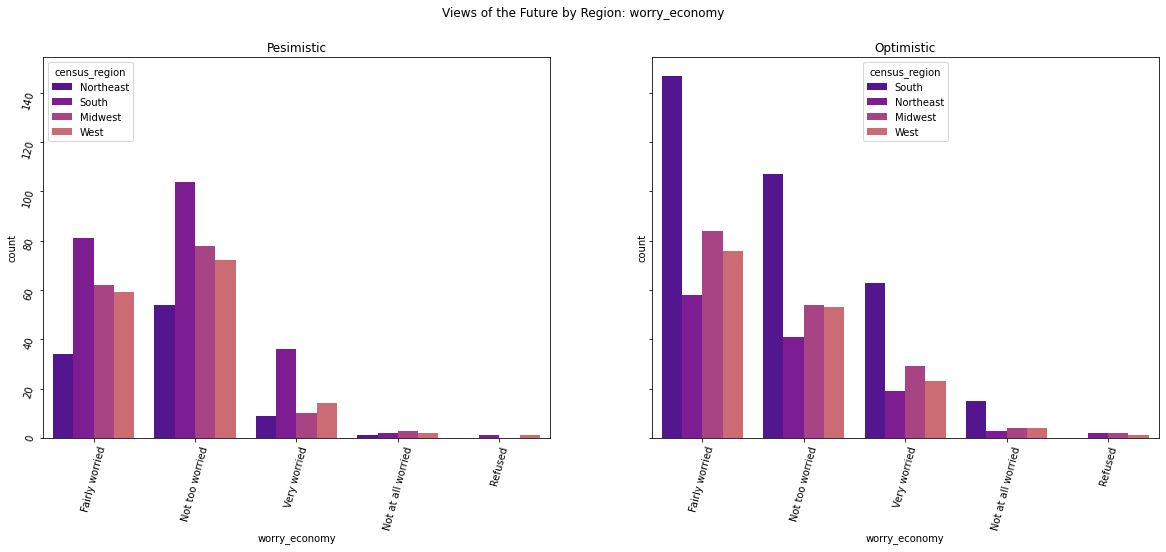

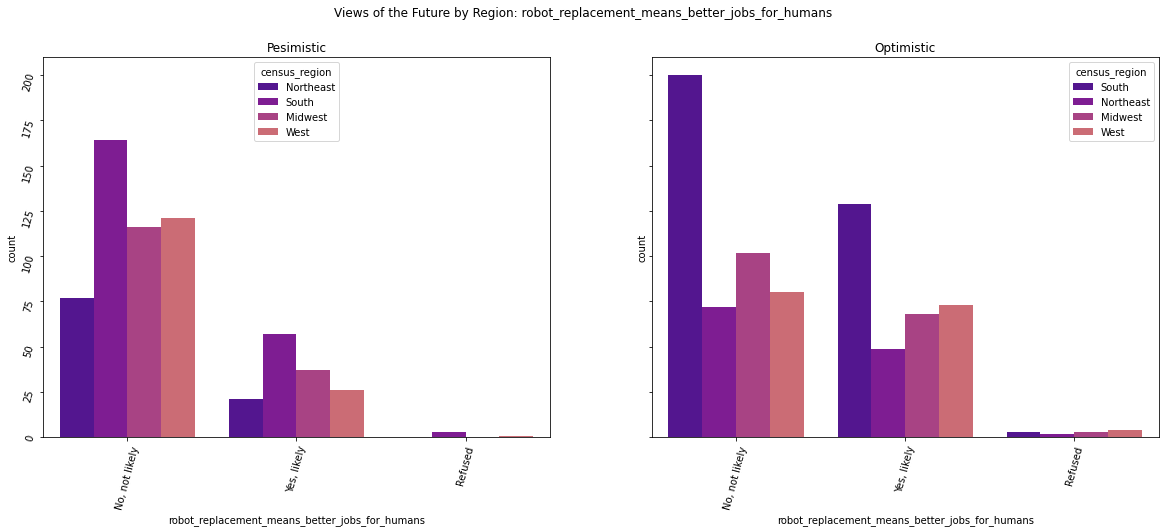

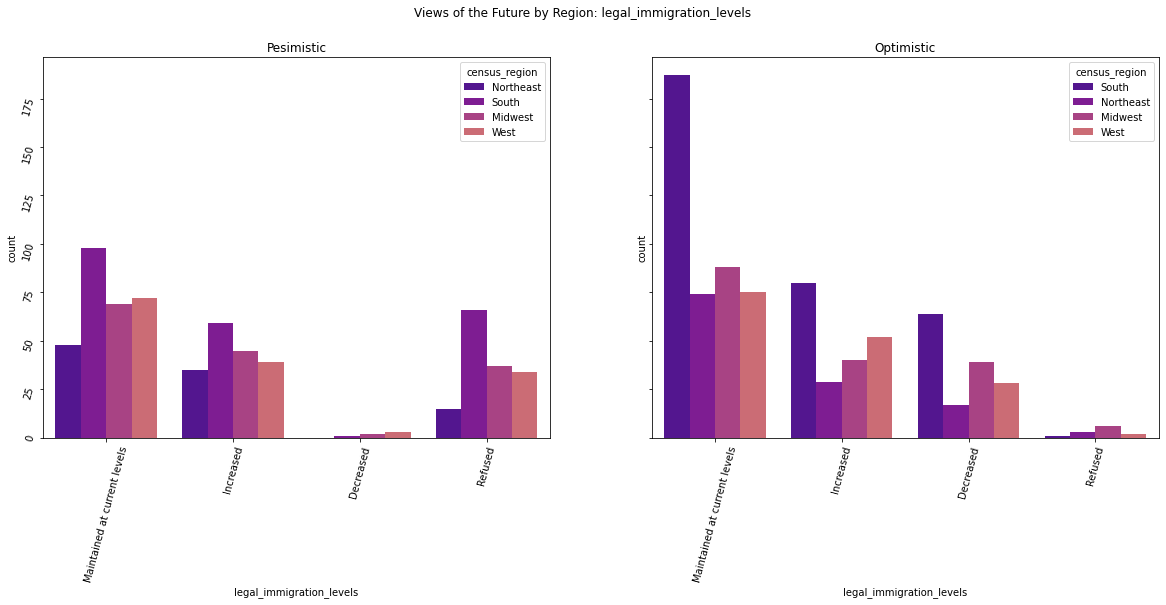

In [37]:
# Economy
# based off of question: contains section about economy
economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels']
for col in economy:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Region: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1)], x= col, ax=axes[0], hue='census_region')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0)], x= col, ax=axes[1], hue='census_region')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

In [38]:
df.columns[100:]

Index(['census_region', 'age', 'sex', 'highest_education_three_categories',
       'highest_education_six_categories', 'hispanic_or_latino', 'race',
       'race_and_ethnicity', 'birthplace', 'us_citizen', 'marital_status',
       'religion', 'evangelical_christian', 'church_attendance',
       'political_party_identity', 'political_party_lean',
       'summary_of_political_party_data', 'family_income_nine_categories',
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object')

In [39]:
for region in df.census_region.unique():
    print(region)
    print(train[train.census_region==region]['highest_education_six_categories'].value_counts())
    print('-----------------')

Northeast
High school graduate               68
College graduate/some post grad    54
Postgraduate                       40
Some college, no degree            37
Associate's degree                 12
Less than high school               9
Don't know/Refused                  1
Name: highest_education_six_categories, dtype: int64
-----------------
South
High school graduate               171
College graduate/some post grad    112
Some college, no degree             98
Postgraduate                        74
Less than high school               53
Associate's degree                  46
Don't know/Refused                   2
Name: highest_education_six_categories, dtype: int64
-----------------
Midwest
High school graduate               112
Some college, no degree             59
College graduate/some post grad     55
Postgraduate                        44
Associate's degree                  34
Less than high school               22
Name: highest_education_six_categories, dtype: int64
--------

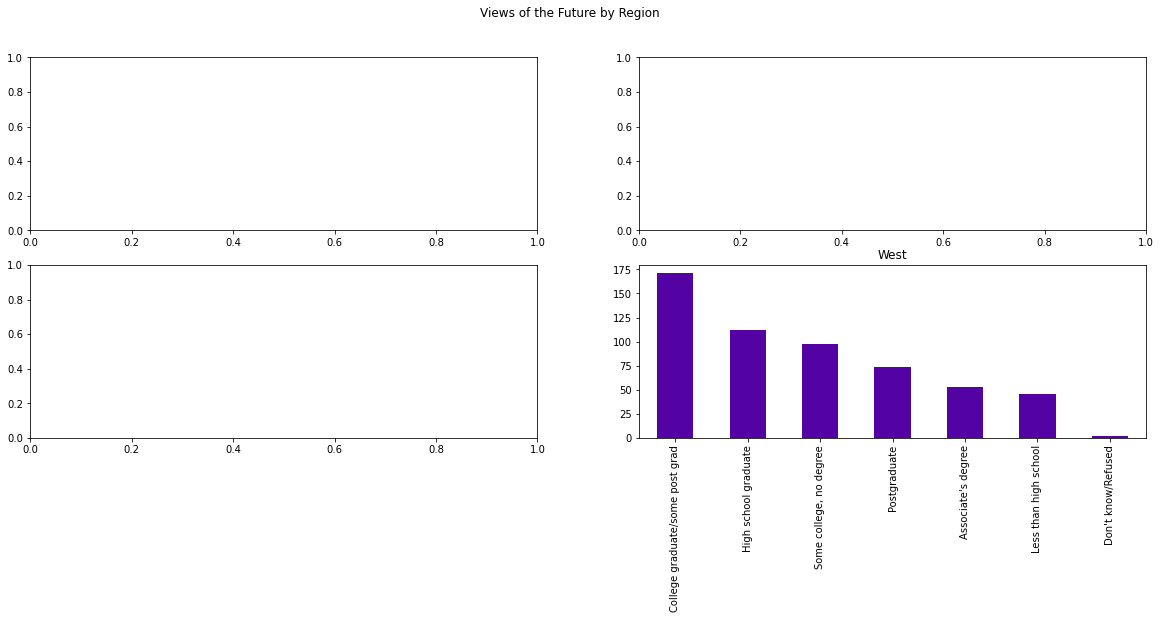

In [40]:
# Economy
# based off of question: contains section about economy
# economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels']

# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=False, sharex=False,  figsize=(20,7))

# Set suptitle
fig.suptitle(f'Views of the Future by Region')
#plt.xticks(rotation=45)

# First plot and its title
axes[0,0]=train[train.census_region=='South']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('South')
#ax1.tick_params(labelrotation=75)

# Second plot and its title
axes[0,1]=train[train.census_region=='Northeast']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('Northeast')
#ax2 = tick_params(labelrotation=75)

# Third plot and its title
axes[1,0]=train[train.census_region=='Midwest']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('Midwest')
#ax2.tick_params(labelrotation=75)

# Fourth plot and its title
axes[1,1]=train[train.census_region=='West']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('West')
#ax3.tick_params(labelrotation=75)

South        556
Midwest      326
West         305
Northeast    221
Name: census_region, dtype: int64


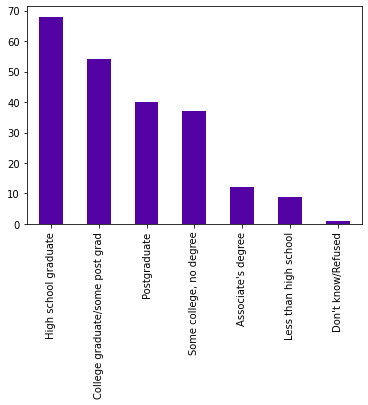

In [41]:
train[train.census_region=='Northeast']['highest_education_six_categories'].value_counts().plot(kind='bar')
print(train.census_region.value_counts())

<AxesSubplot:>

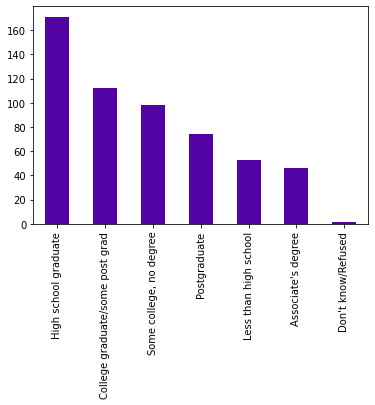

In [42]:
train[train.census_region=='South']['highest_education_six_categories'].value_counts().plot(kind='bar')

<AxesSubplot:>

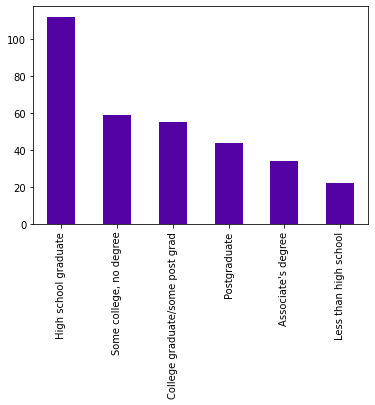

In [43]:
train[train.census_region=='Midwest']['highest_education_six_categories'].value_counts().plot(kind='bar')

In [44]:
most_freq=[]

In [45]:
for region in train.census_region.unique():
    for col in train.drop(columns=['census_region']).columns:
        most_freq.append(train[train==region][col].value_counts()[:1].index)

<AxesSubplot:>

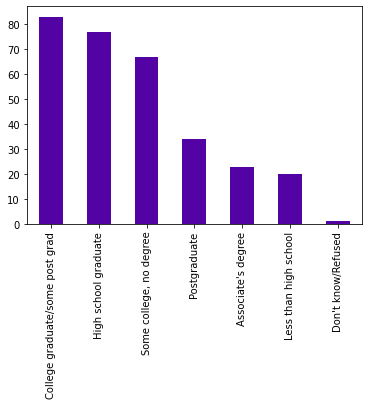

In [46]:
train[train.census_region=='West']['highest_education_six_categories'].value_counts().plot(kind='bar')

In [47]:
train.form.value_counts().mode()

0    695
1    713
dtype: int64

In [48]:
train.form.value_counts()[:1].index.tolist()

['Form 2']

In [51]:
train.is_pes.value_counts()

0    785
1    623
Name: is_pes, dtype: int64

In [124]:
pes_df = train[train.is_pes==1].drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])

for col in pes_df:
    if pes_df[col].value_counts()[0] > (len(pes_df) * .70):
        print(pes_df[col].value_counts())
        print()
        print('|-----------|')

English    617
Spanish      6
Name: language, dtype: int64

|-----------|
Get worse              463
Stay about the same    131
Get better              26
Refused                  3
Name: avg_family, dtype: int64

|-----------|
The U.S. economy will be WEAKER      490
The U.S. economy will be STRONGER     84
Refused                               49
Name: happen_general, dtype: int64

|-----------|
Health care will be LESS affordable    465
Health care will be MORE affordable    115
Refused                                 43
Name: happen_health, dtype: int64

|-----------|
The U.S. will be LESS important in the world    486
The U.S. will be MORE important in the world     94
Refused                                          43
Name: happen_usa, dtype: int64

|-----------|
The gap between the rich and the poor will GROW           537
The gap between the rich and the poor will GET SMALLER     58
Refused                                                    28
Name: happen_wealthgap, dtype: in

In [123]:
opt_df = train[train.is_pes==0].drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])
for col in opt_df:
    if opt_df[col].value_counts()[0] > (len(pes_df) * .70):
        print(opt_df[col].value_counts())
        print()
        print('|-----------|')

Mobile phone    447
Desktop         246
Tablet           92
Name: device_type, dtype: int64

|-----------|
English    768
Spanish     17
Name: language, dtype: int64

|-----------|
The U.S. economy will be STRONGER    453
The U.S. economy will be WEAKER      264
Refused                               68
Name: happen_general, dtype: int64

|-----------|
Race relations will IMPROVE      504
Race relations will GET WORSE    204
Refused                           77
Name: happen_race, dtype: int64

|-----------|
The gap between the rich and the poor will GROW           503
The gap between the rich and the poor will GET SMALLER    205
Refused                                                    77
Name: happen_wealthgap, dtype: int64

|-----------|
Will probably happen          438
Will definitely happen        248
Will probably not happen       78
Will definitely not happen     16
Refused                         5
Name: happen_female_pres, dtype: int64

|-----------|
Will probably not happen  

In [92]:
opt_df.happen_wealthgap.value_counts()

The gap between the rich and the poor will GROW           503
The gap between the rich and the poor will GET SMALLER    205
Refused                                                    77
Name: happen_wealthgap, dtype: int64

In [90]:
pes_df.happen_wealthgap.value_counts()

The gap between the rich and the poor will GROW           537
The gap between the rich and the poor will GET SMALLER     58
Refused                                                    28
Name: happen_wealthgap, dtype: int64

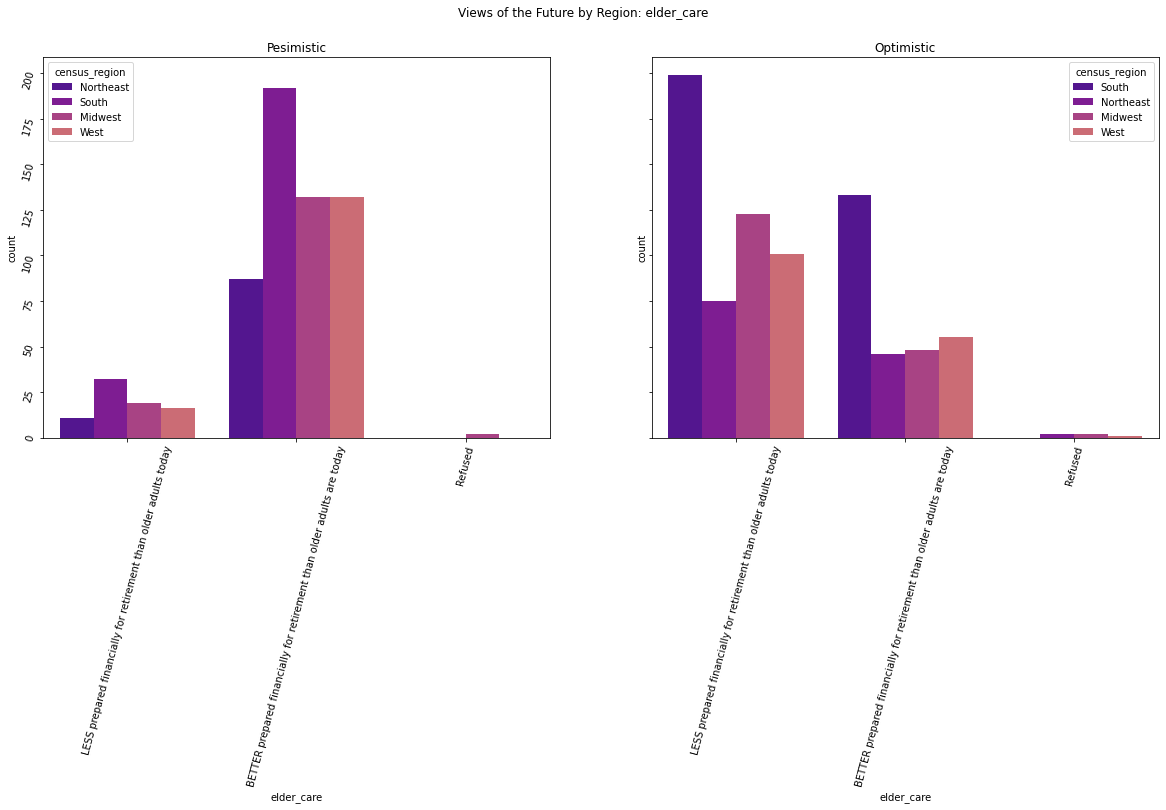

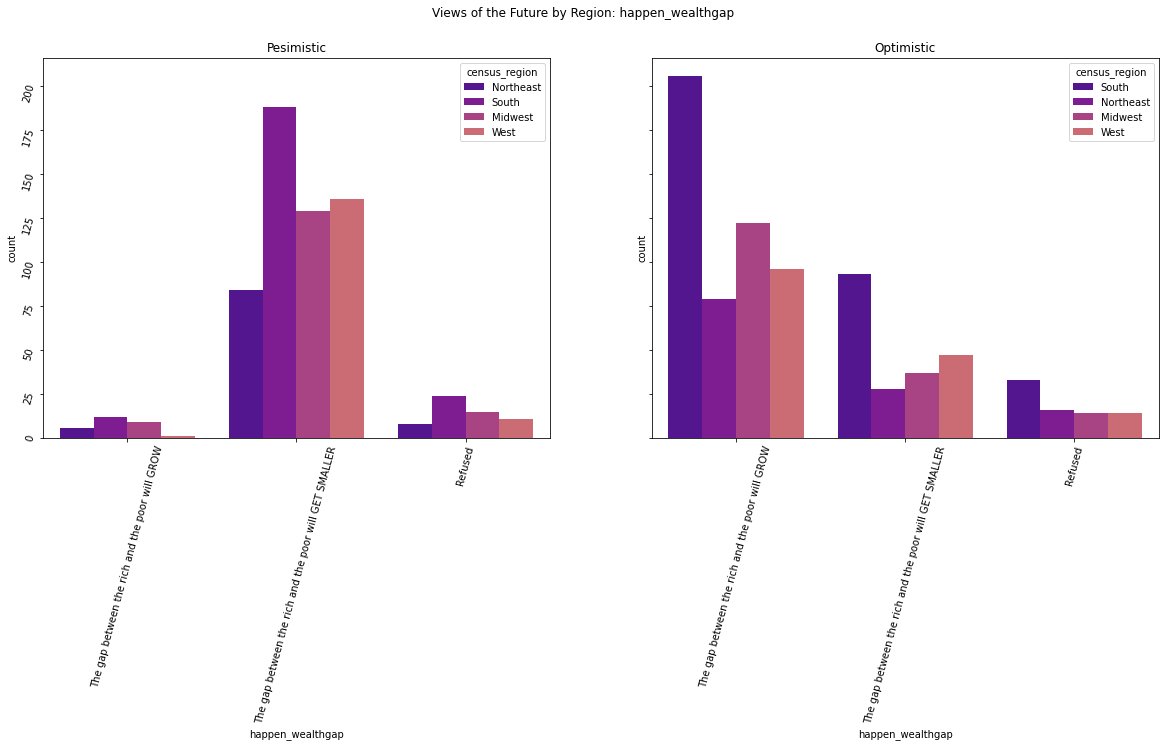

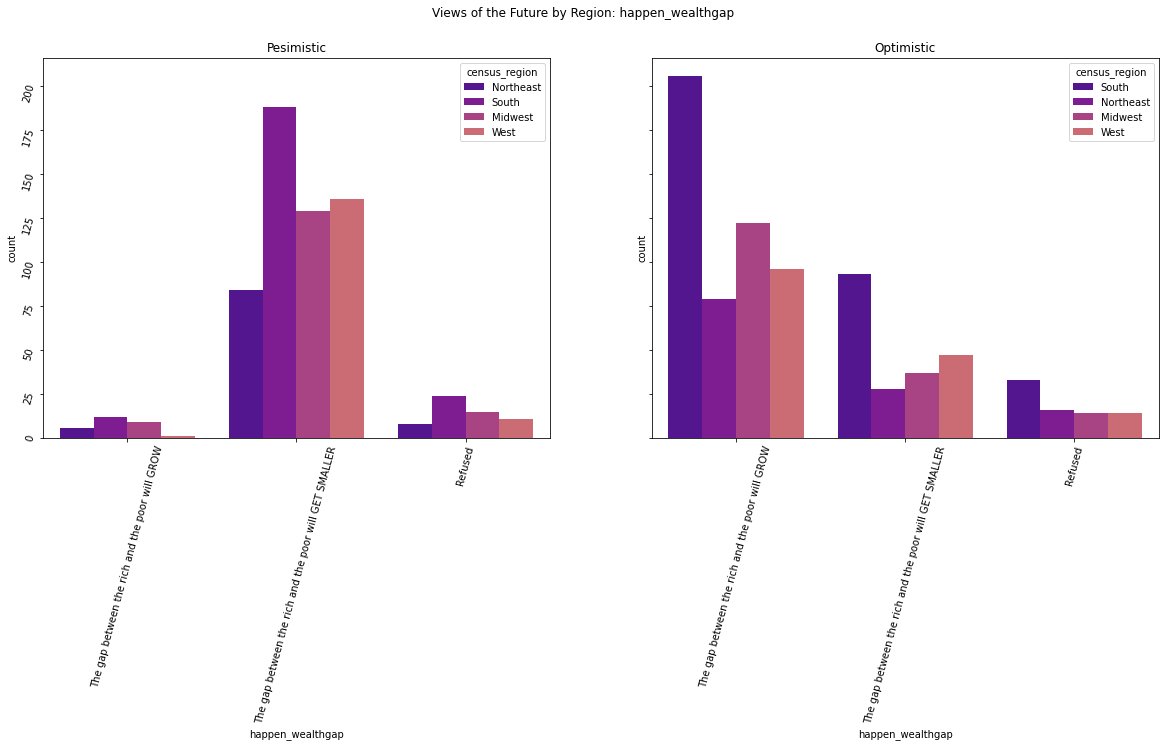

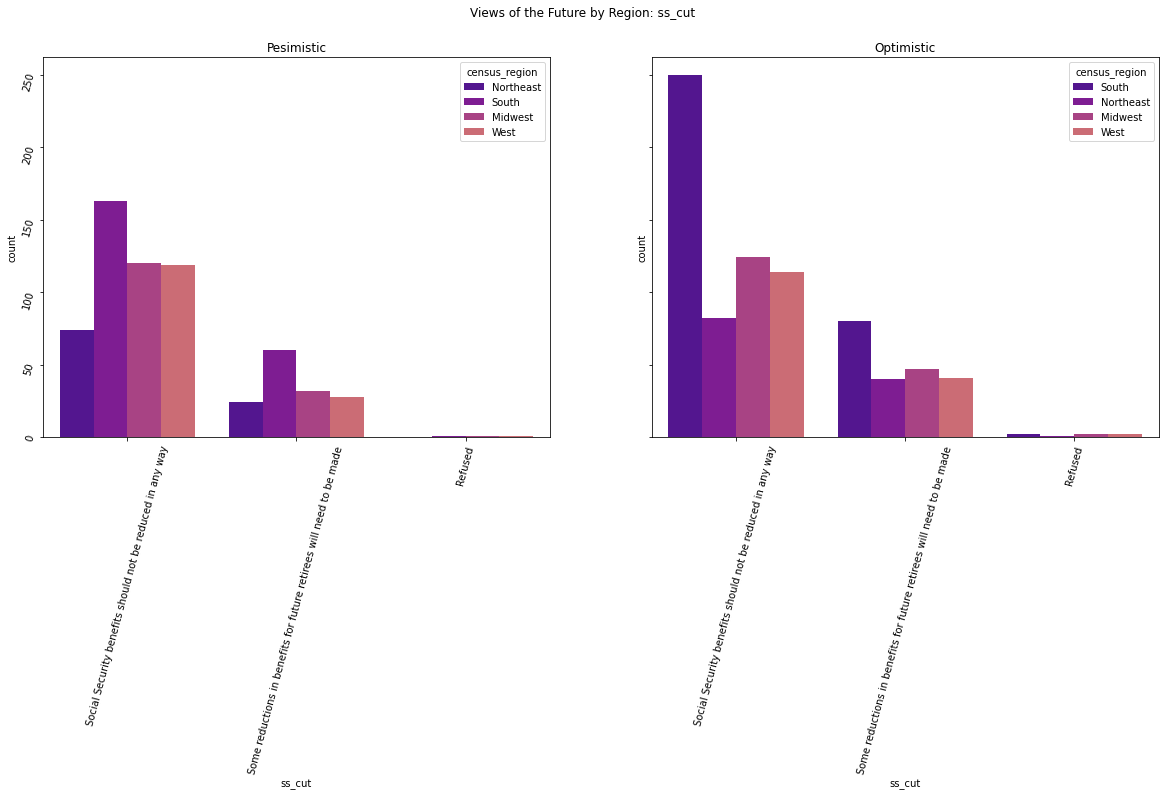

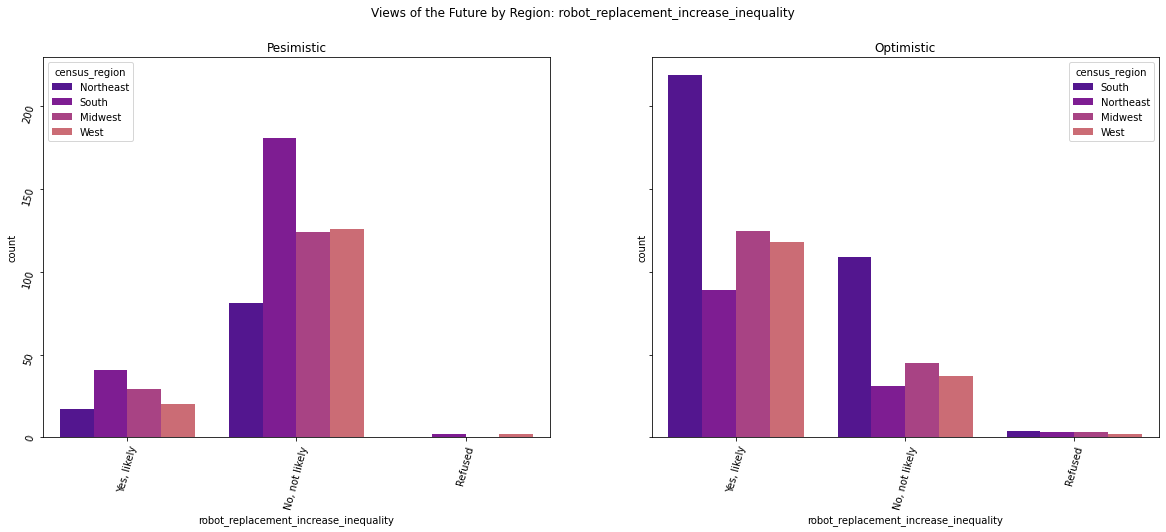

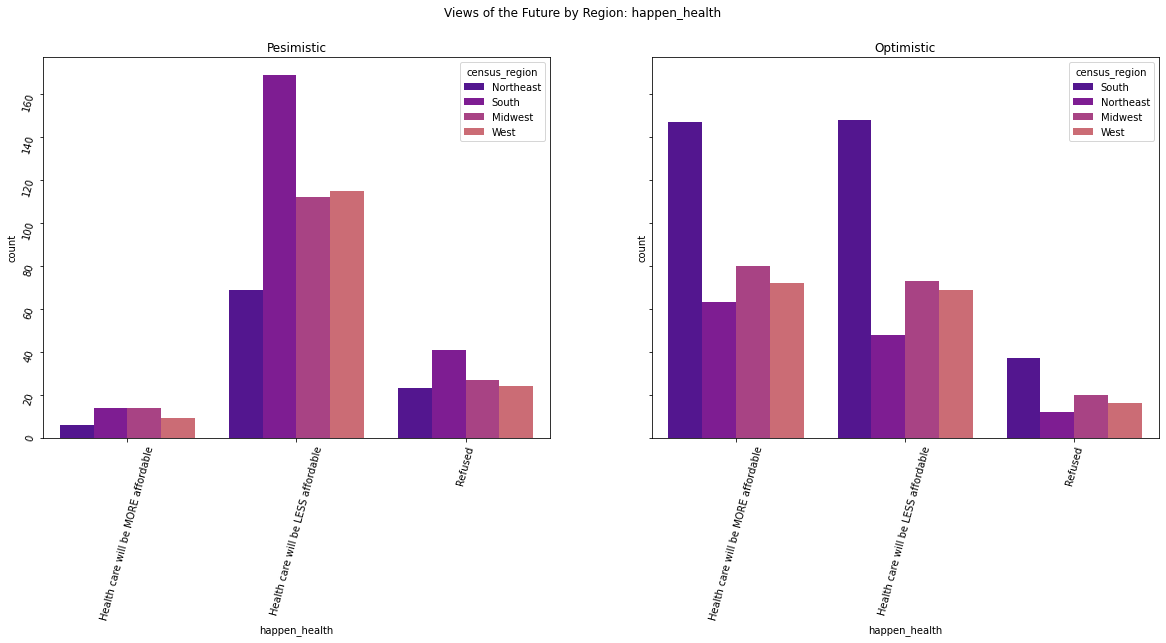

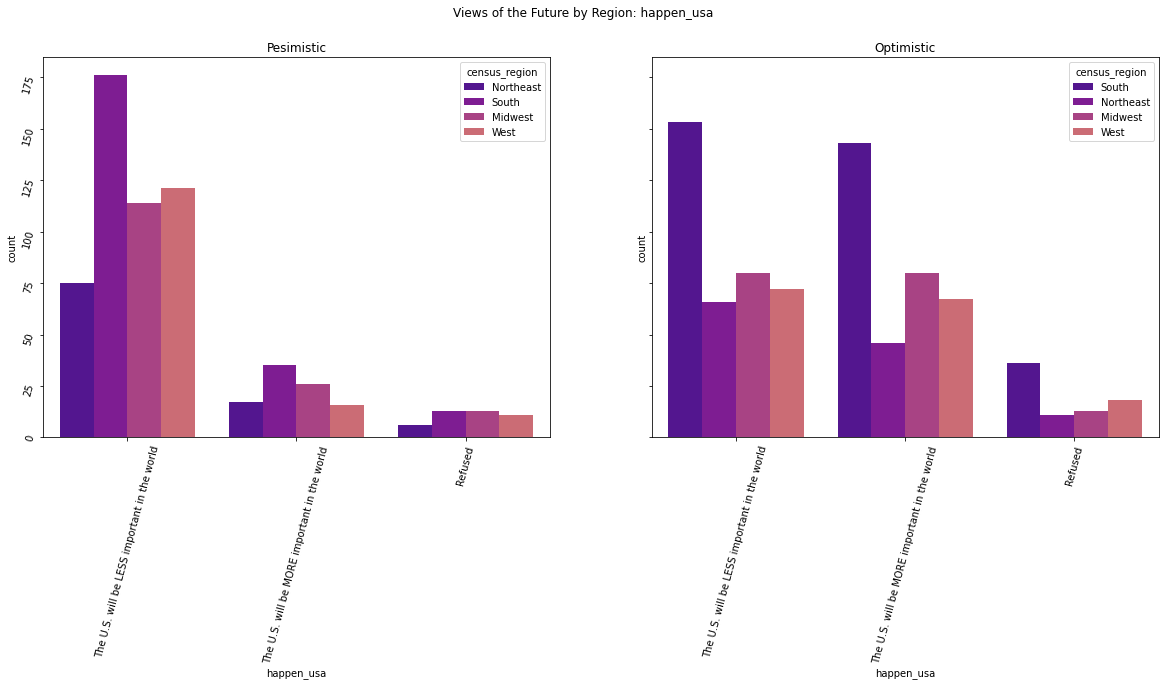

In [267]:
# Economy
# based off of question: contains section about economy
cat_list = ['elder_care', 'happen_wealthgap', 'happen_wealthgap', 'ss_cut', 'robot_replacement_increase_inequality', 'happen_health', 'happen_usa']
for col in cat_list:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Region: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1)], x= col, ax=axes[0], hue='census_region')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0)], x= col, ax=axes[1], hue='census_region')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

In [228]:
train.device_type.unique()

array(['Mobile phone', 'Desktop', 'Tablet'], dtype=object)

<AxesSubplot:xlabel='age', ylabel='count'>

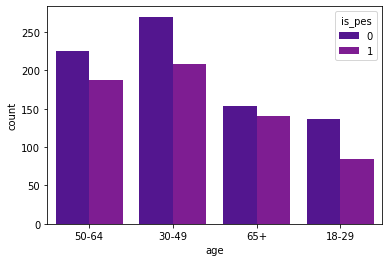

In [245]:
sns.countplot(data=train[train.age!='DK/REF'], x='age', hue='is_pes')

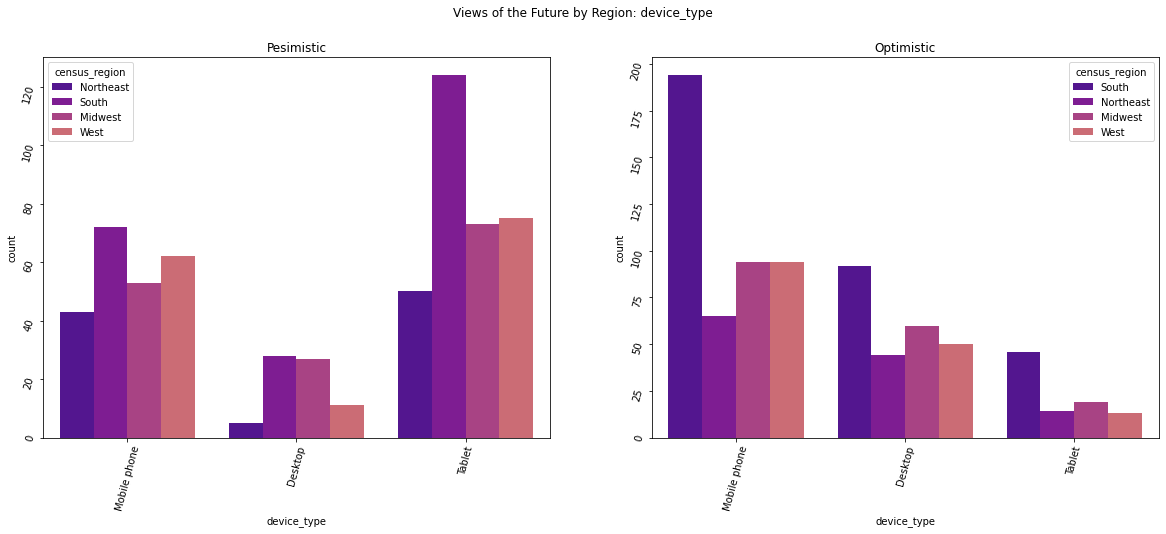

In [229]:
for col in ['device_type']:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Region: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1)], x= col, ax=axes[0], hue='census_region')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0)], x= col, ax=axes[1], hue='census_region')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

In [122]:
young_df = train[(train.age=='30-49') | (train.age=='18-29')].drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])

for col in young_df:
    if young_df[col].value_counts()[0] > (len(young_df) * .70):
        print(young_df[col].value_counts())
        print()
        print('|-----------|')

Mobile phone    492
Desktop         183
Tablet           24
Name: device_type, dtype: int64

|-----------|
English    685
Spanish     14
Name: language, dtype: int64

|-----------|
The gap between the rich and the poor will GROW           511
The gap between the rich and the poor will GET SMALLER    125
Refused                                                    63
Name: happen_wealthgap, dtype: int64

|-----------|
LESS prepared financially for retirement than older adults today          520
BETTER prepared financially for retirement than older adults are today    177
Refused                                                                     2
Name: elder_care, dtype: int64

|-----------|
Yes, likely       527
No, not likely    163
Refused             9
Name: robot_replacement_increase_inequality, dtype: int64

|-----------|
Metropolitan        592
Non-metropolitan    107
Name: metro, dtype: int64

|-----------|
No         553
Yes        141
Refused      5
Name: hispanic_or_latino, dt

In [117]:
old_df.age.unique()

array(['50-64', '65+'], dtype=object)

In [227]:
old_df = train[(train.age=='50-64') | (train.age=='65+')].drop(columns=['language', 'birthplace', 'qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])

for col in old_df:
    if old_df[col].value_counts()[0] > (len(old_df) * .70):
        print(old_df[col].value_counts())
        print()
        print('|-----------|')

The gap between the rich and the poor will GROW           527
The gap between the rich and the poor will GET SMALLER    137
Refused                                                    42
Name: happen_wealthgap, dtype: int64

|-----------|
LESS prepared financially for retirement than older adults today          519
BETTER prepared financially for retirement than older adults are today    182
Refused                                                                     5
Name: elder_care, dtype: int64

|-----------|
Yes, likely       534
No, not likely    165
Refused             7
Name: robot_replacement_increase_inequality, dtype: int64

|-----------|
Social Security benefits should not be reduced in any way               560
Some reductions in benefits for future retirees will need to be made    142
Refused                                                                   4
Name: ss_cut, dtype: int64

|-----------|
Metropolitan        585
Non-metropolitan    121
Name: metro, dtype: int64

In [127]:
train.census_region.value_counts()

South        556
Midwest      326
West         305
Northeast    221
Name: census_region, dtype: int64

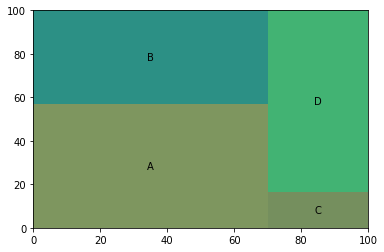

In [131]:
import squarify
sizes = [40, 30, 5, 25]
label=['A', 'B', 'C', 'D']
squarify.plot(sizes)
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
plt.show()

In [154]:
d = train.groupby('age')['priority_increase_military'].count().reset_index().priority_increase_military.values.tolist()
d

[220, 479, 412, 294, 3]

In [158]:
train.groupby('age')['priority_increase_military'].unique()

age
18-29     [nan, An important, but not a top priority, A ...
30-49     [An important, but not a top priority, A top p...
50-64     [nan, An important, but not a top priority, A ...
65+       [A top priority, nan, A lower priority, An imp...
DK/REF                                [A top priority, nan]
Name: priority_increase_military, dtype: object

In [165]:
a = train.groupby('age')['priority_increase_military'].unique().tolist()
a

[array(['nan', 'An important, but not a top priority', 'A lower priority',
        'Should not be done', 'A top priority'], dtype=object),
 array(['An important, but not a top priority', 'A top priority', 'nan',
        'Should not be done', 'A lower priority', 'Refused'], dtype=object),
 array(['nan', 'An important, but not a top priority', 'A top priority',
        'Should not be done', 'A lower priority', 'Refused'], dtype=object),
 array(['A top priority', 'nan', 'A lower priority',
        'An important, but not a top priority', 'Should not be done',
        'Refused'], dtype=object),
 array(['A top priority', 'nan'], dtype=object)]

In [221]:
train.age.unique()

array(['50-64', '30-49', '65+', '18-29', 'DK/REF'], dtype=object)

In [220]:
train[['age', '49_or_younger']]

,age,49_or_younger
1859,50-64,False
96,50-64,False
420,30-49,True
1424,30-49,True
114,65+,False
...,...,...
678,65+,False
957,65+,False
239,30-49,True
1795,30-49,True


In [215]:
train.age.isin(['30-49', '18-29'])

1859    False
96      False
420      True
1424     True
114     False
        ...  
678     False
957     False
239      True
1795     True
1297     True
Name: age, Length: 1408, dtype: bool

<AxesSubplot:xlabel='age', ylabel='count'>

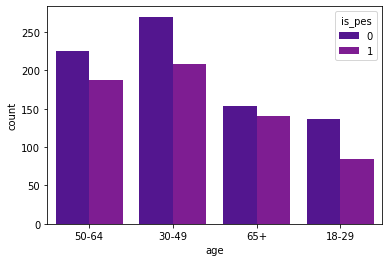

In [254]:
sns.countplot(data=train[train.age!='DK/REF'], x='age', hue='is_pes')

In [ ]:
train.happen_race

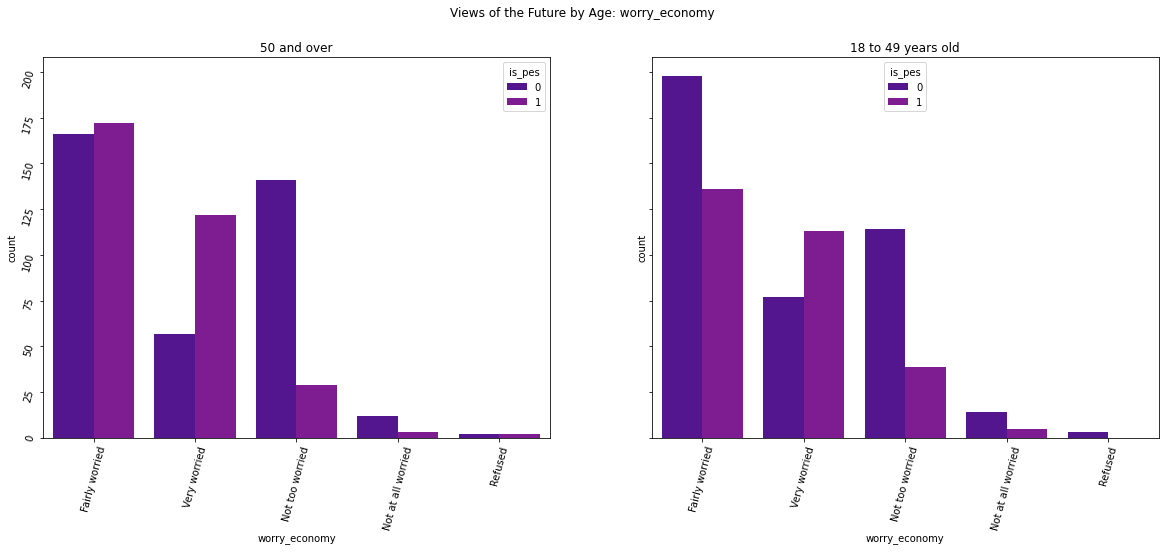

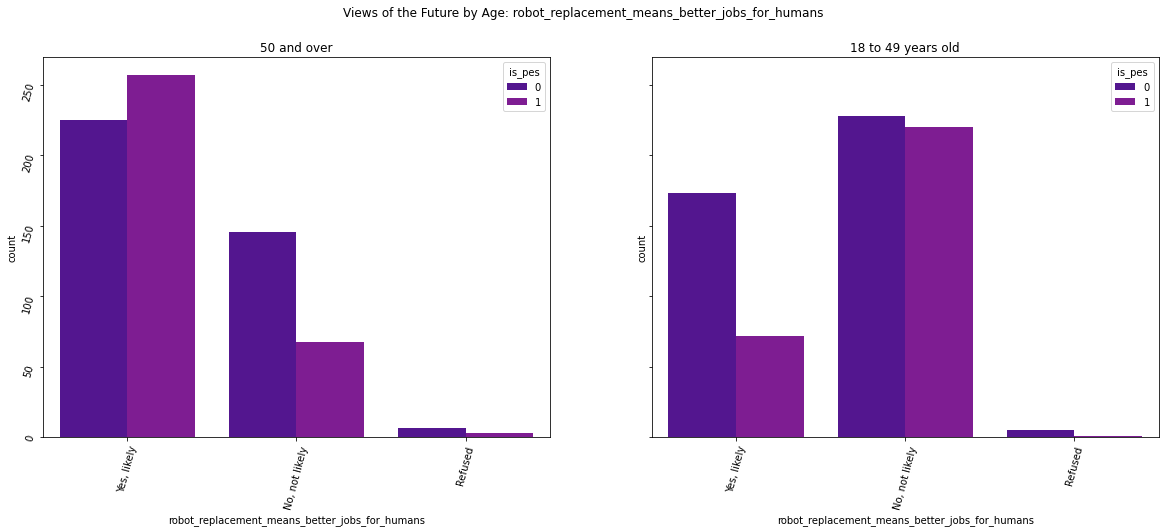

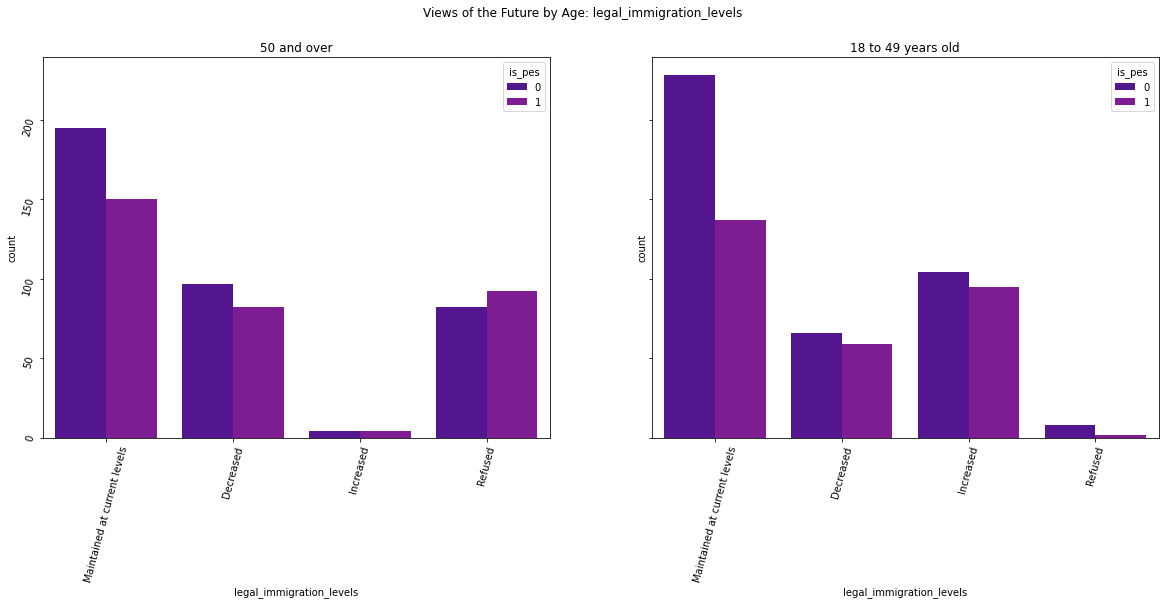

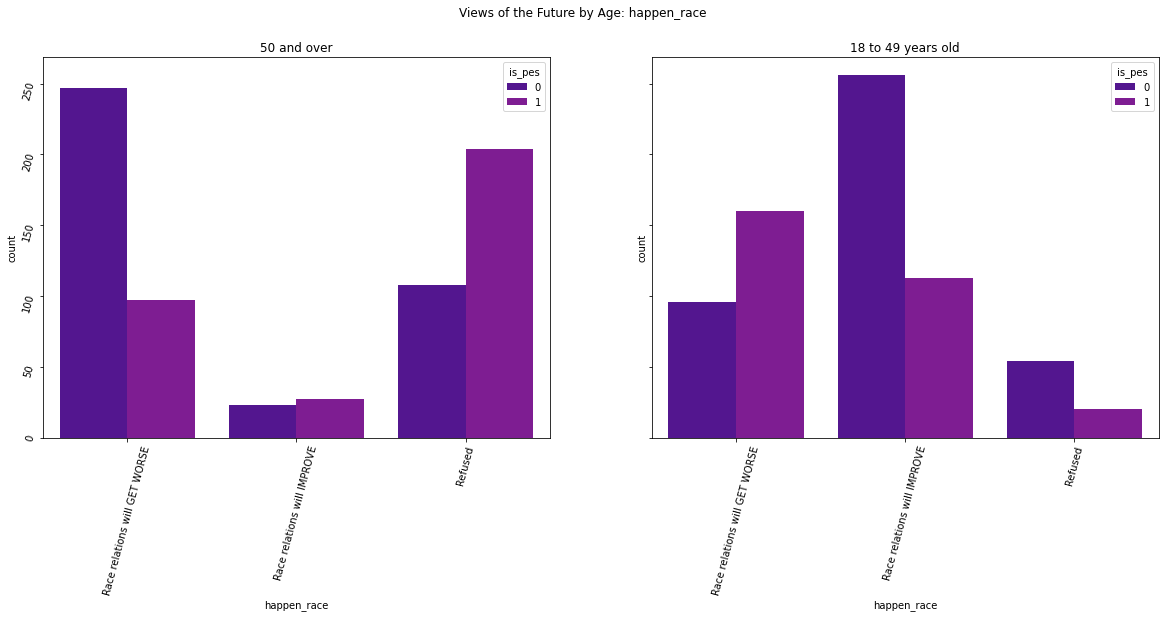

In [259]:
# Economy
# based off of question: contains section about economy
economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels', 'happen_race']
for col in economy:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.age=='50-64') | (train.age=='65+') & (train.age!='DK/REF')], x= col, ax=axes[0], hue='is_pes')
    axes[0].set_title('50 and over')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.age=='18-29') | (train.age=='30-49') & (train.age!='DK/REF')], x= col, ax=axes[1], hue='is_pes')
    axes[1].set_title('18 to 49 years old')
    axes[1].tick_params(labelrotation=75)

In [263]:
pd.crosstab(index=[train.age, train.is_pes],
            columns=train.census_region,
            colnames=['Region'])

Region         Midwest  Northeast  South  West
age    is_pes                                 
18-29  0            28         19     56    33
       1            25         17     23    19
30-49  0            64         31    118    57
       1            50         34     77    48
50-64  0            48         47     91    39
       1            42         21     77    47
65+    0            33         26     66    28
       1            36         26     45    34
DK/REF 0             0          0      1     0
       1             0          0      2     0

In [265]:
pd.crosstab(index=[train.age, train.is_pes],
            columns=train.robot_replacement_increase_inequality,
            colnames=['Region'], margins=True)

Region         No, not likely  Refused  Yes, likely   All
age    is_pes                                            
18-29  0                   31        4          101   136
       1                   13        1           70    84
30-49  0                   79        3          188   270
       1                   40        1          168   209
50-64  0                   61        1          163   225
       1                   30        2          155   187
65+    0                   50        4           99   153
       1                   24        0          117   141
DK/REF 0                    1        0            0     1
       1                    0        0            2     2
All                       329       16         1063  1408

In [268]:
ages = 'happen_wealthgap', 'share_americans_in_middle_class', 'share_americans_in_lower_class', 'happen_usa'

# Age clusters

In [274]:
import numpy as np
# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans


In [ ]:
X=[]

#define and fit the thing
kmeans = KMeans(n_clusters=3, random_state=123).fit(t)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

In [279]:
train = train.replace(replace_key)

In [281]:
X = train.drop(columns=['qkey', 'weight', 'is_pes', 'pes_val', 'is_very_pes', 'is_very_opt', 'attitude'])

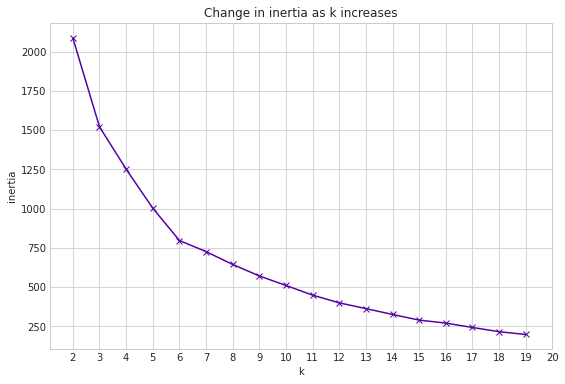

In [301]:
# lets plot inertia vs k
X = train[['age', 'worry_economy', 'happen_wealthgap']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 21))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [304]:
# Fit K-Means (just on train, again!)
X = train[["age", "worry_economy", "happen_wealthgap"]]
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

train['cluster1'] = kmeans.predict(X)

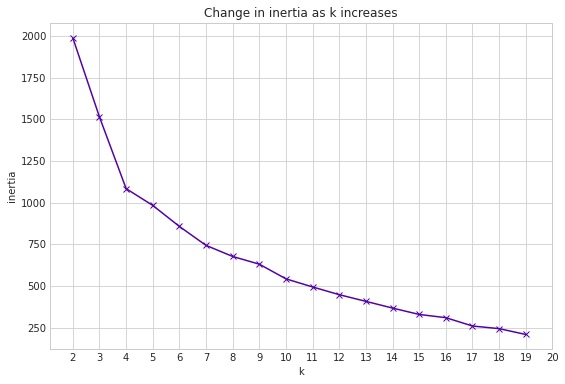

In [305]:
# lets plot inertia vs k
X = train[['age', 'job_benefits', 'job_security']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 21))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [323]:
# Fit K-Means (just on train, again!)
X = train[['age', 'job_benefits', 'job_security']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train['cluster2'] = kmeans.predict(X)

# Region Clusters

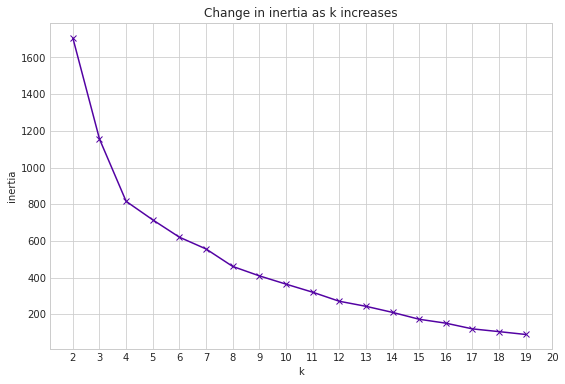

In [310]:
# lets plot inertia vs k
X = train[['census_region', 'legal_immigration_levels', 'ss_cut']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 21))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [322]:
# Fit K-Means (just on train, again!)
X = train[['census_region', 'legal_immigration_levels', 'ss_cut']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train['cluster3'] = kmeans.predict(X)

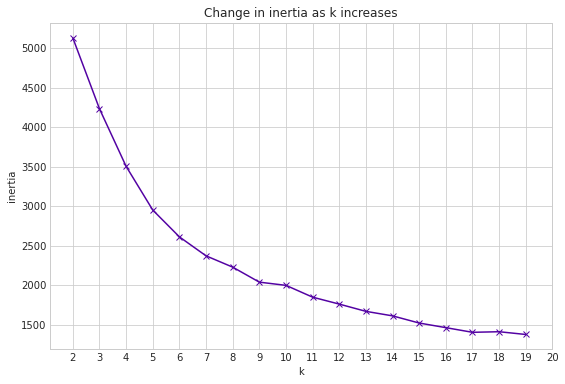

In [320]:
# lets plot inertia vs k
X = train[['census_region', 'religion', 'fut_abortion', 'pop_growth']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 21))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [321]:
# Fit K-Means (just on train, again!)
X = train[['census_region', 'legal_immigration_levels', 'ss_cut']]
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

train['cluster4'] = kmeans.predict(X)